# Convert .Rmd to .ipynb


In [1]:
# install.packages("devtools")
# remove.packages("rlang")
# install.packages("rlang")
# devtools::install_github("mkearney/rmd2jupyter")
# install.packages("rmd2jupyter")
# library("rmd2jupyter")

In [2]:
# rmd to ipynb
# rmd2jupyter("Preprocessing Data for Meta-Analyses.Rmd")

In [3]:
# install.packages("rmarkdown")

# Preprocess data of raw covidence Export



In [4]:
raw.df <- read.csv("final_data_export.csv")


## Install and load Dplyr


In [5]:
# install.packages("dplyr")
library("dplyr")
install.packages("sjmisc")
library("sjmisc")
# for data manipulation with dplyr see: https://www.youtube.com/watch?v=Gvhkp-Yw65U
# for splitting 2 values in 1 cell see: https://www.youtube.com/watch?v=DiY8EqZDwoI at 3:17 (e.g. if 2 scales for 1 outcome)
# for joining 2 data frames see:        https://www.youtube.com/watch?v=DiY8EqZDwoI at 11:57


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Learn more about sjmisc with 'browseVignettes("sjmisc")'.



In [6]:
my.raw.df <- raw.df %>%
  filter(Reviewer.Name == "Robin Jacob", Study.design == "Passive RCT")

## Drop unimportant columns by name

### Remove column rages (first columns)

In [7]:
my.df <- my.raw.df %>%
  select(-Reviewer.Name:-Further.Information.inserted.in.Extraction.Form.)  # "-" indicates deleting these columns

### Remove single column names and repeating names with ascending numbers (table headlines)


In [8]:
cols.pop.char <- c()

for (time.point in 0:4){
  cols.pop.char <- append(cols.pop.char,
                          sprintf("Population.Characteristics..Time.Point.%d..",
                                  time.point
                                  )
                          )
}

cols.outc.t <- c()

for (outc in 1:7){
  for (t in 0:3){
    cols.outc.t <- append(cols.outc.t,
                          sprintf("Outcome.%d..Time.Point.%d..",
                                  outc, t
                                  )
                          )
  }
}

cols.quant.results <- c()

i <- 0
for (int.1 in 1:3){
  i <- i + 1
  if (i == 1){
    for (int.2 in 2:4){
      for (t in 1:3){
        cols.quant.results <- append(cols.quant.results,
                              sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                      int.1, int.2, t
                                      )
                              )
      }
    }
  } else if (i == 2){
    for (int.2 in 3:4){
      for (t in 1:3){
        cols.quant.results <- append(cols.quant.results,
                              sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                      int.1, int.2, t
                                      )
                              )
      }
    }
  } else if (i == 3){
    int.2 <- 4
    for (t in 1:3){
      cols.quant.results <- append(cols.quant.results,
                            sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                    int.1, int.2, t
                                    )
                            )
    }
  } else {
    print("i not = 1, 2, or 3")
  }
}

remove.cols <- c(cols.pop.char[],
                 "Dates.of.Measuring.Time.Points.",
                 "Between.Measuring.Time.Points..Duration.",
                 "Intervention.and.Comparisons.",
                 "Definition.of.Outcomes.",
                 "Measures.of.Outcomes.",
                 cols.outc.t[],
                 cols.quant.results[],
                 "Results.of.Key.Themes."
                 )

my.df <- my.df[, ! names(my.df) %in% remove.cols]

In [9]:
# set options to print entire df (extend max. rows end cols)
options(repr.matrix.max.rows=30, repr.matrix.max.cols=1100)

In [10]:
my.df

Covidence.. Study.ID                
1  4325        Ratanasiripong 2015     
2  4178        Sloan 2016              
3  3762        Nidich 2009             
4  3760        Barry 2019              
5  3759        Chen 2013               
6  3736        Warnecke 2011           
7  2925        Johnson-Waddell 2018    
8  2864        Plummer 2018            
9  2574        Janowiak 1994           
10 2416        Oman 2007               
11 2267        Weytens 2014            
12 2201        Bonamo 2015             
13 2075        Smith 2021              
14 1897        Wang 2021               
15 1889        Fish 2019               
16 1737        Siembor 2018            
17 1582        Lee 2018                
18 1574        Bultas 2021             
19 1469        Huberty 2019            
20 1416        Tanner 2009             
21 1329        deGrace 1976            
22 1322        Messer 2016             
23 1259        Vasiliauskas 2013       
24 1225        Nolan 2020              
25 1159        Dorais 2021             
26  361        Toole 2016              
27  122        Schulte-Frankenfeld 2021
   Title                                                                                                                                                                                            
1  Stress and Anxiety Management in Nursing Students: Biofeedback and Mindfulness Meditation                                                                                                        
2  Self-perceived stress of undergraduate students before and after participation in a breathing meditation intervention: A mixed methods study                                                     
3  A randomized controlled trial on effects of the Transcendental Meditation program on blood pressure, psychological distress, and coping in young adults                                          
4  A randomized controlled trial of the effects of mindfulness practice on doctoral candidate psychological status                                                                                  
5  A randomized controlled trial of the effects of brief mindfulness meditation on anxiety symptoms and systolic blood pressure in Chinese nursing students                                         
6  A randomised controlled trial of the effects of mindfulness practice on medical student stress levels                                                                                            
7  Mindfulness meditation's effect on college/university students' mindfulness and transformational leadership                                                                                      
8  Mindfulness in a Graduate Nursing Curriculum: A Randomized Controlled Study                                                                                                                      
9  Meditation and college students' self-actualization and rated stress                                                                                                                             
10 Learning from spiritual models and meditation: A randomized evaluation of a college course                                                                                                       
11 An integrative theory-driven positive emotion regulation intervention                                                                                                                            
12 The influence of a brief mindfulness exercise on encoding of novel words in female college students                                                                                              
13 Impact of App-Delivered Mindfulness Meditation on Functional Connectivity, Mental Health, and Sleep Disturbances Among Physician Assistant Students: Randomized, Wait-list Controlled Pilot Study
14 Gender differences in the benefits of meditation training on attentional blink                                            


## Create arrays, data frame lists, and data frames from Covidence tables



### Set basic parameters


In [11]:
nm.placeholder <- -999  # placeholder for values marked as nm (not mentioned)

flag.x.s.r <- 2
  # x.s.r = exact value (0), mean s (1), or mean r (2)
  # flag.x.s.r = 2 --> include all
  # flag.x.s.r = 1 --> only include mean s and exact values
  # flag.x.s.r = 0 --> include only exact vaules

study.no <- length(my.df[,"Study.ID"])

### Functions

#### Checking for digits and characters

In [12]:
# function returning TRUE if string contains no characters but digits instead
no.char.but.digit.inside <- function(value){
  !(str_contains(value, letters, logic = "OR") |
  str_contains(value, LETTERS, logic = "OR")) &
  grepl("\\d", value)
}

# function returning TRUE if string contains characters
char.inside <- function(value){
  str_contains(value, letters, logic = "OR") |
  str_contains(value, LETTERS, logic = "OR")
}

In [13]:
char.inside("mindfulness meditation")

[1] TRUE


#### For mean values


In [14]:
# extracts mean r and mean s values as double
get.all.means <- function(value){
  if (grepl("mean r", value)){
    extracted.value <- as.double(sub(" mean r.*", "", value))
        # extracts anything before " mean r" as double                 
  } else if (grepl("mean s", value)){
    extracted.value <- as.double(sub(" mean s.*", "", value))
  } else if (grepl("mean", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean only")
    cat("\n")
  } else {
    extracted.value <- value
  }
  extracted.value
}

# extracts mean s only as double
get.mean.s.only <- function(value){
    if (grepl("mean s", value)){
    extracted.value <- as.double(sub(" mean s.*", "", value))
  } else if (grepl("mean r", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean r")
    cat("\n")
  } else if (grepl("mean", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean only")
    cat("\n")
  } else {
    extracted.value <- value
  }
  extracted.value
}


#### Convert value from nm, NA, digit, or char


In [15]:
 round(1.56565, digits = 3)

[1] 1.566

In [16]:
convert.value <- function(value, missing.value.placeholder = nm.placeholder, only.double = TRUE){
  na.value <- FALSE
  if (is.na(value)){
    na.value <- TRUE
  }
  if (na.value == TRUE){
    extracted.value <- NA
  } else {
    value <- as.character(value)

# special cases
    if (value == "nm"){
      extracted.value <- missing.value.placeholder
    } else if (value == ""){
      extracted.value <- NA
    } else if (value == "^"){
      extracted.value <- value
        # extracts value after "<" as double 
    } else if (grepl("<", value)){
      extracted.value <- as.double(sub(".*<", "", value))
        # extracts value after "<" as double 
    } else if (grepl(">", value)){
      extracted.value <- as.double(sub(".*>", "", value))

# no.char.but.digit
    } else if (no.char.but.digit.inside(value)){
      if (grepl(",", value)){
        cat("decimal separator replaced with point in ", value)
        extracted.value <- as.double(sub(",", ".", value))
          # sub(a, b, value) replaces a with b in value
      } else if (grepl("-", value)){
        # like "0 - 40"
        extracted.value <- value
      } else {
        extracted.value <- as.double(value) 
      }

# char
    } else if (char.inside(value)){
      if (flag.x.s.r == 2){
        extracted.value <- get.all.means(value)
      } else if (flag.x.s.r == 1){
        extracted.value <- get.mean.s.only(value)
      } else if ((flag.x.s.r == 0) & !(grepl("mean r", value) | grepl("mean s", value))){
        extracted.value <- NA
        if (grepl("mean", value)){
          cat("value not added because mean only: ", value)
          cat("\n")
        }
      } else {
        if (only.double == TRUE){
          extracted.value <- NA
          cat("unknown case with char inside: ", value)
          cat("\n")
        } else {
          extracted.value <- value
        }
      }
    } else {
      cat("unknown case: ", value)
      cat("\n")
    }
  }
  extracted.value
}

#### Check if multiple commas are present in string

In [17]:
multiple.commas.present <- function(input.string){
  multiple.commas.present <- FALSE
  comma.count <- 0

  iterable.string <- tryCatch(
    {
      strsplit(input.string, "")[[1]]
        # strsplit(input.string, "")[[1]] makes string iterable
        # "try" part
    },
    error=function(cond) {
      message(paste("Error of multiple.commas.present() for input:", input.string, "| Type:", class(input.string)))
      message(cond)
      return("")
      # "except" part for errors
    },
    warning=function(cond) {
      message(paste("Warning of multiple.commas.present() for input:", input.string, "| Type:", class(input.string)))
      message(cond)
      return("")
      # "except" part for warnings
    }
  )
    # see following link for exception handling: https://stackoverflow.com/questions/12193779/how-to-write-trycatch-in-r

  for (i in iterable.string){
    if (i == ","){
      comma.count <- comma.count + 1
    }
  }
  if (comma.count > 1){
    multiple.commas.present <- TRUE
  }
  multiple.commas.present
}


#### For arrays


In [18]:
clean.and.shape.data.to.array <- function(
  my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
  ){
  my.array <- array(rep(NA),
                    dim = dims,
                    dimnames = dimname.list
                    )
  my.data <- my.df %>%
    select(start:end)
  
  if (length(dims) == 6){
    for (study in 1:study.no){
      my.data.col.no = 1
      for (dim.4.elmnt in 1:dims[4]){
        for (mtrx in 1:dims[3]){
          for (row in 1:dims[1]){
            for (col in 1:dims[2]){
              value <- my.data[study, my.data.col.no]
              my.data.col.no <- my.data.col.no + 1
              if (grepl(",", value)){
                if (!multiple.commas.present(value)){
                  value.before.comma <- sub(",.*", "", value)
                    # extracts anything before "," as double
                  my.array[row, col, mtrx, dim.4.elmnt, 1, study] <- convert.value(
                    value.before.comma, nm.placeholder
                    )
                  value.after.comma <- sub(".*,", "", value)
                    # extracts anything after "," as double
                  my.array[row, col, mtrx, dim.4.elmnt, 2, study] <- convert.value(
                    value.after.comma, nm.placeholder
                    )
                } else {
                    cat(value, "has multiple commas, find solution")
                  }
              } else {
                my.array[row, col, mtrx, dim.4.elmnt, 1, study] <- convert.value(
                  value, nm.placeholder
                  )
              }
            }
          }
        }
      }
    }
  } else if (length(dims) <= 4){
    for (study in 1:study.no){
      my.data.col.no = 1
      for (mtrx in 1:dims[3]){
        for (row in 1:dims[1]){
          for (col in 1:dims[2]){
            value <- my.data[study, my.data.col.no]
            my.data.col.no <- my.data.col.no + 1
            my.array[row, col, mtrx, study] <- convert.value(
              value, nm.placeholder
              )
          }
        }
      }
    }
  } else {
    print("unknwon dimesion")
  }
  my.array
}


#### For data frame lists


In [19]:
# create data frames out of 2D Tables (with rows and cols swapped)
clean.data.to.df.list.swap <- function(
  my.df, start, end, dims, study.names, dimname.list, check.multiple.commas = FALSE
  ){
  study.df <- data.frame(matrix(
    rep(NA),
    nrow = dims[1],
    ncol = dims[2]
  ))
  row.names(study.df) <- dimname.list[[1]]
  colnames(study.df) <- dimname.list[[2]]
  
  # create list of NA data frames of preferred shape
  study.df.list <- list()
  for (i in 1:length(study.names)){
    study.df.list <- append(study.df.list, list(study.df), 0)
  }
  names(study.df.list) <- study.names
  
  my.data <- my.df %>%
    select(start:end)
  
  # vector of my.data.col.no to swapped rows and cols of Covidence output
  my.data.col.no.swapped <- c()
  i <- 0
  j <- 1
  for (k in 1:dims[1]){
    i <- 0
    for (l in 1:dims[2]){
      my.data.col.no.swapped <- append(my.data.col.no.swapped, i * dims[1] + j)
      i <- i + 1
    }
    j <- j + 1 
  }
  # dims[1] = rows new, cols old
  # dims[2] = cols new, rows old
  
  # e.g., filling pattern for old 4 x 7 and new 7 x 4 data frame 
  ## 1, dims[1]+1, 2*dims[1]+1, 3*dims[1]+1, 4*dims[1]+1, 5*dims[1]+1, 6*dims[1]+1,
  ## 2, dims[1]+2, 2*dims[1]+2, 3*dims[1]+2, 4*dims[1]+2, 5*dims[1]+2, 6*dims[1]+2,
  ## x, x, x, x, x, x, x,
  ## x, x, x, x, x, x, x
  
  for (study in 1:study.no){
    m <- 1
    for (row in 1:dims[1]){
      for (col in 1:dims[2]){
        value <- my.data[study, my.data.col.no.swapped[m]]
        m <- m + 1

        if (check.multiple.commas & is.character(value)){
          if (multiple.commas.present(value)){
            cat("multiple commas in value, find solution:\n", value, "\n")
          }
        }
        
        study.df.list[[study]][row, col] <- convert.value(
          value, nm.placeholder, only.double = FALSE
          )
      }
    }
  }
  study.df.list
}


In [20]:
# create data frames out of 2D Tables
clean.data.to.df.list <- function(
  my.df, start, end, dims, study.names, dimname.list, check.multiple.commas = FALSE
  ){
  study.df <- data.frame(matrix(
    rep(NA),
    nrow = dims[1],
    ncol = dims[2]
  ))
  row.names(study.df) <- dimname.list[[1]]
  colnames(study.df) <- dimname.list[[2]]
  
  # create list of NA data frames of preferred shape
  study.df.list <- list()
  for (i in 1:length(study.names)){
    study.df.list <- append(study.df.list, list(study.df), 0)
  }
  names(study.df.list) <- study.names
  
  my.data <- my.df %>%
    select(start:end)
  
  for (study in 1:study.no){
    my.data.col.no <- 1
    for (row in 1:dims[1]){
      for (col in 1:dims[2]){
        value <- my.data[study, my.data.col.no]
        my.data.col.no <- my.data.col.no + 1
        
        if (check.multiple.commas & is.character(value)){
          if (multiple.commas.present(value)){
            cat("multiple commas in value, find solution:\n", value, "\n")
          }
        }
        study.df.list[[study]][row, col] <- convert.value(
          value, nm.placeholder, only.double = FALSE
          )
      }
    }
  }
  study.df.list
}


#### Print arrays

In [21]:
print.array.not.na <- function(input.array){
  if (length(dim(input.array)) == 6){
    for (dim.6.element in 1:dim(input.array)[6]){
      cat("\n###### ", dimnames(input.array)[[6]][dim.6.element], " ######")
      for (dim.5.element in 1:dim(input.array)[5]){
        cat("\n### ", dimnames(input.array)[[5]][dim.5.element], " ###")
        for (dim.4.element in 1:dim(input.array)[4]){
          cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
          for (mtrx in 1:dim(input.array)[3]){
            mtrx.is.na <- TRUE
            for (col in 1:dim(input.array)[2]){
              for (row in 1:dim(input.array)[1]){
                if (!is.na(input.array[
                  row, col, mtrx, dim.4.element, dim.5.element, dim.6.element
                                      ]
                          )
                   ){
                     mtrx.is.na <- FALSE
                }
              }
            }
            if (mtrx.is.na == FALSE){
              print(dimnames(input.array)[[3]][mtrx])
              print(input.array[,,mtrx, dim.4.element, dim.5.element, dim.6.element])
              cat("\n")
            }
          } 
        }
      }
    }
  } else if (length(dim(input.array)) == 5){
    for (dim.5.element in 1:dim(input.array)[5]){
      cat("\n### ", dimnames(input.array)[[5]][dim.5.element], " ###")
      for (dim.4.element in 1:dim(input.array)[4]){
        cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
        for (mtrx in 1:dim(input.array)[3]){
          mtrx.is.na <- TRUE
          for (col in 1:dim(input.array)[2]){
            for (row in 1:dim(input.array)[1]){
              if (!is.na(input.array[
                row, col, mtrx, dim.4.element, dim.5.element
                                    ]
                        )
                  ){
                    mtrx.is.na <- FALSE
              }
            }
          }
          if (mtrx.is.na == FALSE){
            print(dimnames(input.array)[[3]][mtrx])
            print(input.array[,,mtrx, dim.4.element, dim.5.element])
            cat("\n")
          }
        } 
      }
    } 
  } else if (length(dim(input.array)) == 4){
    for (dim.4.element in 1:dim(input.array)[4]){
      cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
      for (mtrx in 1:dim(input.array)[3]){
        mtrx.is.na <- TRUE
        for (col in 1:dim(input.array)[2]){
          for (row in 1:dim(input.array)[1]){
            if (!is.na(input.array[
              row, col, mtrx, dim.4.element
                                  ]
                      )
                ){
                  mtrx.is.na <- FALSE
            }
          }
        }
        if (mtrx.is.na == FALSE){
          print(dimnames(input.array)[[3]][mtrx])
          print(input.array[,,mtrx, dim.4.element])
          cat("\n")
        }
      } 
    }
  } else if (length(dim(input.array)) == 3){
    for (mtrx in 1:dim(input.array)[3]){
      mtrx.is.na <- TRUE
      for (col in 1:dim(input.array)[2]){
        for (row in 1:dim(input.array)[1]){
          if (!is.na(input.array[
            row, col, mtrx
                                ]
                    )
              ){
                mtrx.is.na <- FALSE
          }
        }
      }
      if (mtrx.is.na == FALSE){
        print(dimnames(input.array)[[3]][mtrx])
        print(input.array[,,mtrx])
        cat("\n")
      }
    }
  } else {
    print("unknown case")
  }
}

### Arrays


#### Population Characteristics

In [22]:
dims <- c(4, 5, 4, study.no)

dimname.list <- list(c("No.Participants", "Mean.Age", "No.Females", "No.Males"),
                     c("Intervention.1", "Intervention.2", "Intervention.3", "Intervention.4", "Over.All"),
                     c("T0", "T1", "T2", "T3"),
                     my.df[,"Study.ID"]
                     )

start <- "Number.of.Participants.Intervention.1.T0"
end <- "Number.of.Males.Over.All.T3"

population.characteristics.array <- clean.and.shape.data.to.array(
  my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
)

my.df <- my.df %>%
  select(-Number.of.Participants.Intervention.1.T0:-Number.of.Males.Over.All.T3)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(start)` instead of `start` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(end)` instead of `end` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


##### Correct input mistakes

In [23]:
if (
  is.na(population.characteristics.array["No.Participants", "Intervention.4", 1, "Janowiak 1994"]) &
  population.characteristics.array["No.Participants", "Intervention.3", 1, "Janowiak 1994"] == 21
){
  population.characteristics.array["No.Participants", "Intervention.4", 1, "Janowiak 1994"] <- 21
  population.characteristics.array["No.Participants", "Intervention.3", 1, "Janowiak 1994"] <- NA

  population.characteristics.array[, "Intervention.4", 1, "Smith 2021"] <- population.characteristics.array[, "Intervention.2", 1, "Smith 2021"]
  population.characteristics.array[, "Intervention.2", 1, "Smith 2021"] <- NA
}



In [24]:
print.array.not.na(population.characteristics.array)


# Ratanasiripong 2015 
[1] "T0"
                Intervention.1 Intervention.2 Intervention.3 Intervention.4
No.Participants             29             29             NA             31
Mean.Age                    NA             NA             NA             NA
No.Females                  NA             NA             NA             NA
No.Males                    NA             NA             NA             NA
                Over.All
No.Participants    89.00
Mean.Age           19.27
No.Females         89.00
No.Males              NA


# Sloan 2016 
[1] "T0"
                Intervention.1 Intervention.2 Intervention.3 Intervention.4
No.Participants             22             NA             NA             20
Mean.Age                    NA             NA             NA             NA
No.Females                  NA             NA             NA             NA
No.Males                    NA             NA             NA             NA
                Over.All
No.Participants       42
Mean.Ag

#### Results Descriptive

In [25]:
dims <- c(4, 3, 4, 7, 2, study.no)

dimname.list <- list(c("Intervention.1", "Intervention.2", "Intervention.3", "Control"),
                     c("Mean", "SD", "n"),
                     c("T0", "T1", "T2", "T3"),
                     c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("Scale.1", "Scale.2"),
                     my.df[,"Study.ID"]
                     )

start <- "Intervention.1.Mean.O1T0"
end <- "Control.or.Intervention.4.n.in.case.of.period.O7T3"

results.descriptive.array <- clean.and.shape.data.to.array(
    my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
)

my.df <- my.df %>%
  select(-Intervention.1.Mean.O1T0:-Control.or.Intervention.4.n.in.case.of.period.O7T3)

In [26]:
# use my.pop.char.array[,,"T0","Johnson-Waddell 2018"] as test for "", NA, "nm", "double"
#      [,1]  [,2] [,3] [,4]  [,5]
# [1,] "197" NA   NA   "197" 394 
# [2,] ""    ""   NA   ""    "nm"
# [3,] ""    NA   NA   ""    "nm"
# [4,] ""    NA   NA   ""    "" 
# make flag.x.s.r work --> done


##### Correct input mistakes

In [27]:
if (!is.na(results.descriptive.array["Intervention.1", "Mean", "T1", "Outcome.2", "Scale.1", "Ratanasiripong 2015"])){
  results.descriptive.array["Intervention.2",, "T1", "Outcome.2", "Scale.1", "Ratanasiripong 2015"] <- results.descriptive.array["Intervention.1",, "T1", "Outcome.2", "Scale.1", "Ratanasiripong 2015"]
  results.descriptive.array["Intervention.1",, "T1", "Outcome.2", "Scale.1", "Ratanasiripong 2015"] <- NA
}

In [28]:
print.array.not.na(results.descriptive.array)


######  Ratanasiripong 2015  ######
###  Scale.1  ###
# Outcome.1 
[1] "T0"
                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 17.24 4.16 NA
Intervention.3    NA   NA NA
Control        17.29 3.50 NA

[1] "T1"
                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 14.90 3.44 NA
Intervention.3    NA   NA NA
Control        16.74 4.71 NA


# Outcome.2 
[1] "T0"
                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 25.45 7.80 NA
Intervention.3    NA   NA NA
Control        23.74 7.72 NA

[1] "T1"
                Mean   SD  n
Intervention.1    NA   NA NA
Intervention.2 21.28 6.95 NA
Intervention.3    NA   NA NA
Control        24.74 9.91 NA


# Outcome.3 

# Outcome.4 

# Outcome.5 

# Outcome.6 

# Outcome.7 

###  Scale.2  ###
# Outcome.1 

# Outcome.2 

# Outcome.3 

# Outcome.4 

# Outcome.5 

# Outcome.6 

# Outcome.7 

######  Sloan 2016  ######
###  Scale.1  ###
# Outcome.1 
[1] "T0"
                  Mean      SD  n
Interventi


#### Results Quantitative


In [29]:
dims <- c(7, 3, 3, 6, 2, study.no)

dimname.list <- list(c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("P.Value", "Effect.Size", "Effect.Size.CI"),
                     c("T1", "T2", "T3"),
                     c("Int1.X.Int2", "Int1.X.Int3", "Int1.X.Int4", "Int2.X.Int3", "Int2.X.Int4", "Int3.X.Int4"),
                     c("Scale.1", "Scale.2"),
                     my.df[,"Study.ID"]
                     )

start <- "Outcome.1.P.Value.1x2T1"
end <- "Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3"

results.quantitative.array <- clean.and.shape.data.to.array(
    my.df, start, end, dims, dimname.list, nm.placeholder, flag.x.s.r, study.no
)
my.df <- my.df %>%
  select(-Outcome.1.P.Value.1x2T1:-Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3)

### Data frame lists

#### Intervention Comparison

In [30]:
dims <- c(4, 7)

study.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Intervention.1", "Intervention.2", "Intervention.3", "Control"),
                     c("Name", "Short.Description", "Delivery.Mode", "Meditation.App", "Sessions.Duration.in.minutes",
                       "Frequency.in.times.per.week", "Total.Duration.in.Days")
                     )
start <- "Name.Intervention.1"
end <- "Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4"

intervention.comparisons.df.list <- clean.data.to.df.list.swap(
 my.df, start, end, dims, study.names, dimname.list
)

my.df <- my.df %>%
  select(-Name.Intervention.1:-Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4)

intervention.comparisons.df.list

value  0.99 mean  not added because mean only
value  36.67 mean  not added because mean only
value  3.79 during intervention, 2.04 during follow-up mean  not added because mean only
value  4.19 mean  not added because mean only
value  12.5 mean  not added because mean only
value  2.5 mean  not added because mean only
value  11.19 mean  not added because mean only
value  2.82 mean  not added because mean only


$`Ratanasiripong 2015`
                                 Name Short.Description Delivery.Mode
Intervention.1                   <NA>                NA            NA
Intervention.2 mindfulness meditation                NA            NA
Intervention.3                   <NA>                NA            NA
Control               no intervention                NA            NA
               Meditation.App Sessions.Duration.in.minutes
Intervention.1             NA                           NA
Intervention.2             NA                           NA
Intervention.3             NA                           NA
Control                    NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days
Intervention.1                          NA                     NA
Intervention.2                          NA                     NA
Intervention.3                          NA                     NA
Control                                 NA                     NA

$`Sloan 2016`
                               Name
Intervention.1 breathing meditation
Intervention.2                 <NA>
Intervention.3                 <NA>
Control             no intervention
                                          Short.Description
Intervention.1 "guided audio-recorded breathing meditation"
Intervention.2                                         <NA>
Intervention.3                                         <NA>
Control                                                <NA>
                                                                      Delivery.Mode
Intervention.1 Asynchronous guiding by a recorded voice (e.g. App), audio recording
Intervention.2                                                                 <NA>
Intervention.3                                                                 <NA>
Control                                                                        <NA>
               Meditation.App Sessions.Duration.in.minutes
Intervention.1             NA                            9
Intervention.2             NA                           NA
Intervention.3             NA                           NA
Control                    NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days
Intervention.1                          NA                     56
Intervention.2                          NA                     NA
Intervention.3                          NA                     NA
Control                                 NA                     NA

$`Nidich 2009`
                                          Name
Intervention.1  Transcendental meditation (TM)
Intervention.2                            <NA>
Intervention.3                            <NA>
Control                      wait-list control
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Short.Description
Intervention.1 "The TM technique [...] that allows the\nordinary thinking process to become more quiescent and a\nunique psychophysiologic state of “restful alertness” to be\ngained.28 This distinctive state of restful alertnes


#### Measures of Outcomes


In [31]:
dims <- c(7, 3)

study.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("Measures.Name", "Start.and.End.Point", "High.or.low.means.resilient")
                     )
start <- "Outcome.1.Scale.s.or.other.Measure.s.Name"
end <- "Outcome.7.High.or.low.means.resilient"

outcome.measures.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, study.names, dimname.list, check.multiple.commas = TRUE
)

my.df <- my.df %>%
  select(-Outcome.1.Scale.s.or.other.Measure.s.Name:-Outcome.7.High.or.low.means.resilient)

outcome.measures.df.list


multiple commas in value, find solution:
 Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983) 
multiple commas in value, find solution:
 State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983) 
multiple commas in value, find solution:
 Depression, Anxiety
and Stress Scale (DASS) 26, Perceived Stress Scale
(PSS)27,28 
decimal separator replaced with point in  0 - 40, 0 - 42

Warning message in convert.value(value, nm.placeholder, only.double = FALSE):
“NAs introduced by coercion”


multiple commas in value, find solution:
 Cognitive and Affective Mindfulness Scale–Revised (CAMS-R; Feldman, Hayes, Kumar, Greeson, & Laurenceau, 2007) 
multiple commas in value, find solution:
 Perceived Stress Scale (PSS-10; Cohen, Kamarck, & Mermelstein, 1983) 
multiple commas in value, find solution:
 The Perceived Stress Scale (PSS; Cohen, Kamark, & Mermelstein, 1983) 
multiple commas in value, find solution:
 Five Facet Mindfulness Questionnaire (FFMQ; Baer, Smith, Hopkins, Krietemeyer, & Toney, 2006) 
multiple commas in value, find solution:
 Batson Empathy Adjectives (BEA; Batson, 1986; Coke, Batson, & McDavis, 1978) 
multiple commas in value, find solution:
 Depression, Anxiety, and Stress Scale – 21 (DASS-21) 
multiple commas in value, find solution:
 Depression, Anxiety, and Stress Scale – 21 (DASS-21) 
multiple commas in value, find solution:
 Depression, Anxiety, and Stress Scale – 21 (DASS-21),
Perceived Stress Scale (PSS) 
decimal separator replaced with point in  0 - 4

Warning message in convert.value(value, nm.placeholder, only.double = FALSE):
“NAs introduced by coercion”


multiple commas in value, find solution:
 Questionnaire for the Assessment of Happiness ( ger.: Lebensglückskala, LSS) (Ciccarello & Reinhard, 2014) 


$`Ratanasiripong 2015`
                                                                                                             Measures.Name
Outcome.1                                                Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983)
Outcome.2 State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983)
Outcome.3                                                                                                             <NA>
Outcome.4                                                                                                             <NA>
Outcome.5                                                                                                             <NA>
Outcome.6                                                                                                             <NA>
Outcome.7                                                                                                             <NA>
          Start.and.End.Point High.or.low.means.resilient
Outcome.1                -999                        -999
Outcome.2                  NA                          NA
Outcome.3                  NA                          NA
Outcome.4                  NA                          NA
Outcome.5                  NA                          NA
Outcome.6                  NA                          NA
Outcome.7                  NA                          NA

$`Sloan 2016`
                             Measures.Name Start.and.End.Point
Outcome.1 The Perceived Stress Scale (PSS)              0 - 40
Outcome.2                             <NA>                <NA>
Outcome.3                             <NA>                <NA>
Outcome.4                             <NA>                <NA>
Outcome.5                             <NA>                <NA>
Outcome.6                             <NA>                <NA>
Outcome.7                             <NA>                <NA>
          High.or.low.means.resilient
Outcome.1                           v
Outcome.2                        <NA>
Outcome.3                        <NA>
Outcome.4                        <NA>
Outcome.5                        <NA>
Outcome.6                        <NA>
Outcome.7                        <NA>

$`Nidich 2009`
                                                        Measures.Name
Outcome.1 Profile of Mood States total mood disturbance main scale 23
Outcome.2                     Profile of Mood States anxiety subscale
Outcome.3                  Profile of Mood States depression subscale
Outcome.4                                                        <NA>
Outcome.5                                                        <NA>
Outcome.6                                                        <NA>
Outcome.7                                                        <NA>
          Start.and.End.Point High.or.low.means.resilient
Outcome.1                -999                        -999
Outcome.2                -999                        -999
Outcome.3                -999                        -999
Outcome.4                  NA                          NA
Outcome.5                  NA                          NA
Outcome.6                  NA                          NA
Outcome.7                  NA                          NA

$`Barry 2019`
                                                                                Measures.Name
Outcome.1                                     Depression, Anxiety\nand Stress Scale (DASS) 26
Outcome.2                                     Depression, Anxiety\nand Stress Scale (DASS) 26
Outcome.3 Depression, Anxiety\nand Stress Scale (DASS) 26, Perceived Stress Scale\n(PSS)27,28
Outcome.4                                       Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.5                                       Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.6                                       Psychological Capital\nQuestionnaire (P


#### Qualitative Results of Data Analyses


In [32]:
dims <- c(7, 3)

study.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Key.Theme.1", "Key.Theme.2", "Key.Theme.3", "Key.Theme.4", "Key.Theme.5", "Key.Theme.6", "Key.Theme.7"),
                     c("Name.of.Key.Theme", "Description.of.Key.Theme", "Results")
                     )
start <- "Key.Theme.1.Name.of.Key.Theme"
end <- "Key.Theme.7.Results"

results.qualitative.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, study.names, dimname.list
)

my.df <- my.df %>%
  select(-Key.Theme.1.Name.of.Key.Theme:-Key.Theme.7.Results)

results.qualitative.df.list


$`Ratanasiripong 2015`
            Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1                NA                       NA      NA
Key.Theme.2                NA                       NA      NA
Key.Theme.3                NA                       NA      NA
Key.Theme.4                NA                       NA      NA
Key.Theme.5                NA                       NA      NA
Key.Theme.6                NA                       NA      NA
Key.Theme.7                NA                       NA      NA

$`Sloan 2016`
                      Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1 See "Table 18. Major Codes"                       NA      NA
Key.Theme.2                        <NA>                       NA      NA
Key.Theme.3                        <NA>                       NA      NA
Key.Theme.4                        <NA>                       NA      NA
Key.Theme.5                        <NA>                       NA      NA
Key.Theme.6                        <NA>                       NA      NA
Key.Theme.7                        <NA>                       NA      NA

$`Nidich 2009`
            Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1                NA                       NA      NA
Key.Theme.2                NA                       NA      NA
Key.Theme.3                NA                       NA      NA
Key.Theme.4                NA                       NA      NA
Key.Theme.5                NA                       NA      NA
Key.Theme.6                NA                       NA      NA
Key.Theme.7                NA                       NA      NA

$`Barry 2019`
                                      Name.of.Key.Theme
Key.Theme.1    Self-reported stress during trial period
Key.Theme.2 Self-Stress-Management during\ntrial period
Key.Theme.3                                        <NA>
Key.Theme.4                                        <NA>
Key.Theme.5                                        <NA>
Key.Theme.6                                        <NA>
Key.Theme.7                                        <NA>
                                                                                                                                                                                                                                   Description.of.Key.Theme
Key.Theme.1                                                                                                                                                   Question: "Did you experience any stress related to your\nPhD during the last 8-week period?"
Key.Theme.2 Question: "Did you undertake or receive any other support\nwith the aim to reduce stress related to your PhD during the last 8-week period? If so, please describe below and outline whether this helped you to cope\nwith your stress levels."
Key.Theme.3                                                                                                                                                                                                                                            <NA>
Key.Theme.4                                                                                                                                                                                                                                            <NA>
Key.Theme.5                                                                                                                                                                                                                                            <NA>
Key.Theme.6                                                                                                                                                                                                                                            <NA>
Key.Theme.7                                                                                                                    

### Data frames


#### Dates of Measuring Time Points


In [33]:
dates.measuring.time.points.df <- my.df[
  , which(colnames(my.df)=="Time.Point.0.Date"):which(colnames(my.df)=="Time.Point.3.Date")
]

for (row in 1:nrow(dates.measuring.time.points.df)){
  for (col in 1:ncol(dates.measuring.time.points.df)){
    dates.measuring.time.points.df[row, col] <- convert.value(dates.measuring.time.points.df[row, col])
  }
}

rownames(dates.measuring.time.points.df) <- study.names

my.df <- my.df %>%
  select(-Time.Point.0.Date:-Time.Point.3.Date)


dates.measuring.time.points.df

Time.Point.0.Date             
Ratanasiripong 2015      NA                            
Sloan 2016               NA                            
Nidich 2009              NA                            
Barry 2019               NA                            
Chen 2013                NA                            
Warnecke 2011            NA                            
Johnson-Waddell 2018     NA                            
Plummer 2018             NA                            
Janowiak 1994            NA                            
Oman 2007                NA                            
Weytens 2014             1 week before the intervention
Bonamo 2015              NA                            
Smith 2021               NA                            
Wang 2021                NA                            
Fish 2019                NA                            
Siembor 2018             NA                            
Lee 2018                 NA                            
Bultas 2021              NA                            
Huberty 2019             NA                            
Tanner 2009              NA                            
deGrace 1976             NA                            
Messer 2016              NA                            
Vasiliauskas 2013        NA                            
Nolan 2020               NA                            
Dorais 2021              NA                            
Toole 2016               NA                            
Schulte-Frankenfeld 2021 NA                            
                         Time.Point.1.Date              Time.Point.2.Date
Ratanasiripong 2015      NA                             NA               
Sloan 2016               NA                             NA               
Nidich 2009              NA                             NA               
Barry 2019               NA                             NA               
Chen 2013                NA                             NA               
Warnecke 2011            NA                             NA               
Johnson-Waddell 2018     NA                             NA               
Plummer 2018             NA                             NA               
Janowiak 1994            NA                             NA               
Oman 2007                NA                             NA               
Weytens 2014             2 weeks after the intervention NA               
Bonamo 2015              NA                             NA               
Smith 2021               NA                             NA               
Wang 2021                NA                             NA               
Fish 2019                NA                             NA               
Siembor 2018             NA                             NA               
Lee 2018                 NA                             NA               
Bultas 2021              NA                             NA               
Huberty 2019             NA                             NA               
Tanner 2009              NA                             NA               
deGrace 1976             NA                             NA               
Messer 2016              NA                             NA               
Vasiliauskas 2013        NA                             NA               
Nolan 2020               NA                             NA               
Dorais 2021              NA                             NA               
Toole 2016               NA                             NA               
Schulte-Frankenfeld 2021 NA                             NA               
                         Time.Point.3.Date
Ratanasiripong 2015      NA               
Sloan 2016               NA               
Nidich 2009              NA               
Barry 2019               NA               
Chen 2013                NA               
Warnecke 2011            NA               
Johnson-Waddell 2018     NA               
Plummer 2018             NA              


#### Between-Measuring Time Points Duration


In [34]:
between.T.duration.df <- my.df[
  , which(colnames(my.df)=="Time.Point.0...1.Duration.in.Days"):which(colnames(my.df)=="Time.Point.0...3.Duration.in.Days")
]

for (row in 1:nrow(between.T.duration.df)){
  for (col in 1:ncol(between.T.duration.df)){
    between.T.duration.df[row, col] <- convert.value(between.T.duration.df[row, col])
  }
}

rownames(between.T.duration.df) <- study.names

my.df <- my.df %>%
  select(-Time.Point.0...1.Duration.in.Days:-Time.Point.0...3.Duration.in.Days)

between.T.duration.df

value  7 mean  not added because mean only


Time.Point.0...1.Duration.in.Days
Ratanasiripong 2015      28                               
Sloan 2016               NA                               
Nidich 2009              90                               
Barry 2019               NA                               
Chen 2013                6                                
Warnecke 2011            56                               
Johnson-Waddell 2018     45.5                             
Plummer 2018             70                               
Janowiak 1994            NA                               
Oman 2007                56                               
Weytens 2014             NA                               
Bonamo 2015              0                                
Smith 2021               56                               
Wang 2021                NA                               
Fish 2019                NA                               
Siembor 2018             NA                               
Lee 2018                 28                               
Bultas 2021              NA                               
Huberty 2019             56                               
Tanner 2009              91.25                            
deGrace 1976             NA                               
Messer 2016              NA                               
Vasiliauskas 2013        21                               
Nolan 2020               NA                               
Dorais 2021              13                               
Toole 2016               NA                               
Schulte-Frankenfeld 2021 57                               
                         Time.Point.0...2.Duration.in.Days
Ratanasiripong 2015       NA                              
Sloan 2016                NA                              
Nidich 2009               NA                              
Barry 2019                NA                              
Chen 2013                 NA                              
Warnecke 2011            112                              
Johnson-Waddell 2018      NA                              
Plummer 2018             140                              
Janowiak 1994             NA                              
Oman 2007                112                              
Weytens 2014              NA                              
Bonamo 2015               NA                              
Smith 2021                NA                              
Wang 2021                 NA                              
Fish 2019                 NA                              
Siembor 2018              NA                              
Lee 2018                  NA                              
Bultas 2021               NA                              
Huberty 2019              84                              
Tanner 2009               NA                              
deGrace 1976              NA                              
Messer 2016               NA                              
Vasiliauskas 2013         NA                              
Nolan 2020                NA                              
Dorais 2021               27                              
Toole 2016                NA                              
Schulte-Frankenfeld 2021  NA                              
                         Time.Point.0...3.Duration.in.Days
Ratanasiripong 2015       NA                              
Sloan 2016                NA                              
Nidich 2009               NA                              
Barry 2019                NA                              
Chen 2013                 NA                              
Warnecke 2011             NA                              
Johnson-Waddell 2018      NA                              
Plummer 2018             224                              
Janowiak 1994             NA                              
Oman 2007                 NA                              
Weytens 2014              NA                              
Bonamo 2015  


#### Definition of Outcomes


In [35]:
outcome.definitions.df <- my.df[
  , which(colnames(my.df)=="Outcome.1.Definition"):which(colnames(my.df)=="Outcome.7.Definition")
]

for (row in 1:nrow(outcome.definitions.df)){
  for (col in 1:ncol(outcome.definitions.df)){
    outcome.definitions.df[row, col] <- convert.value(outcome.definitions.df[row, col])
  }
}

rownames(outcome.definitions.df) <- study.names

my.df <- my.df %>%
  select(-Outcome.1.Definition:-Outcome.7.Definition)

outcome.definitions.df

Outcome.1.Definition                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Ratanasiripong 2015      "Lazarus and Folkman (1984) asserted that a psychological\nexperience of stress results when a situation is perceived to be\nharmful or exceeding one’s resources"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
Sloan 2016               "The definition of stress varies somewhat throughout the literature; however, most\ndefinitions appear to be grounded in the individual work of Hans Selye (1956), a\nprominent endocrinologist, and Richard S. Lazarus (1966), a well-known psychologist\nboth interested in the scholarship of stress. The generally accepted definition attributed to\nLazarus defines stress as the emotional response when life “demands exceed the personal\nand social resources the individual is able to mobilize” (Stress Management from Mind\nTools, n.d., para. 7).\nAccording to the American Institute of Stress (American Institute of Stress [AIS],\nn.d.) stress can be categorized as (a) acute, an episodic stress experience exhibited as an\nimmediate fight or flight response to circumstances such as earning a bad grade or\nfrustration with a roommate; 

#### Outcome Names

In [36]:
outcome.names.df <- my.df[, which(colnames(my.df)=="Name.of.Outcome.1"):which(colnames(my.df)=="Name.of.Outcome.7")]

for (row in 1:nrow(outcome.names.df)){
  for (col in 1:ncol(outcome.names.df)){
    outcome.names.df[row, col] <- convert.value(outcome.names.df[row, col])
  }
}

my.df <- my.df %>%
  select(-Name.of.Outcome.1:-Name.of.Outcome.7)

rownames(outcome.names.df) <- study.names
outcome.names.df

Name.of.Outcome.1                              
Ratanasiripong 2015      Stress                                         
Sloan 2016               Stress                                         
Nidich 2009              Stress                                         
Barry 2019               Depression (trait)                             
Chen 2013                Anxiety (trait)                                
Warnecke 2011            Stress                                         
Johnson-Waddell 2018     Mindfulness (trait)                            
Plummer 2018             Stress                                         
Janowiak 1994            Stress                                         
Oman 2007                Religiosity or spirituality or religious coping
Weytens 2014             Well-being or quality of life                  
Bonamo 2015              Mindfulness (state)                            
Smith 2021               Depression (trait)                             
Wang 2021                Anxiety (state)                                
Fish 2019                Depression (trait)                             
Siembor 2018             Mindfulness (trait)                            
Lee 2018                 Stress                                         
Bultas 2021              Stress                                         
Huberty 2019             Stress                                         
Tanner 2009              Mindfulness (trait)                            
deGrace 1976             Self-acceptance                                
Messer 2016              Stress                                         
Vasiliauskas 2013        Empathy                                        
Nolan 2020               Mindfulness (trait)                            
Dorais 2021              Stress                                         
Toole 2016               Self-compassion                                
Schulte-Frankenfeld 2021 Stress                                         
                         Name.of.Outcome.2            
Ratanasiripong 2015      Anxiety (state)              
Sloan 2016               NA                           
Nidich 2009              Anxiety (trait)              
Barry 2019               Anxiety (trait)              
Chen 2013                Depression (trait)           
Warnecke 2011            Depression (trait)           
Johnson-Waddell 2018     NA                           
Plummer 2018             Mindfulness (trait)          
Janowiak 1994            NA                           
Oman 2007                NA                           
Weytens 2014             Depression (trait)           
Bonamo 2015              Anxiety (state)              
Smith 2021               Anxiety (trait)              
Wang 2021                NA                           
Fish 2019                NA                           
Siembor 2018             Stress                       
Lee 2018                 Anxiety (state)              
Bultas 2021              Resilience Scale             
Huberty 2019             Mindfulness (trait)          
Tanner 2009              NA                           
deGrace 1976             NA                           
Messer 2016              Mindfulness (trait)          
Vasiliauskas 2013        NA                           
Nolan 2020               Depression (trait)           
Dorais 2021              Mindfulness (trait)          
Toole 2016               Self-esteem                  
Schulte-Frankenfeld 2021 Well-being or quality of life
                         Name.of.Outcome.3             Name.of.Outcome.4 
Ratanasiripong 2015      NA                            NA                
Sloan 2016               NA                            NA                
Nidich 2009              Depression (trait)            NA                
Barry 2019               Stress                        Self-efficacy     
Chen 2013                NA                            NA              

#### Meditation Techniques

In [37]:
meditation.techniques.df <- my.df[
  , which(colnames(my.df)=="Practiced.Techniques.in.Intervention.1"):which(colnames(my.df)=="Practiced.Techniques.in.Control.or.Intervention.4")
]

for (row in 1:nrow(meditation.techniques.df)){
  for (col in 1:ncol(meditation.techniques.df)){
    meditation.techniques.df[row, col] <- convert.value(meditation.techniques.df[row, col])
  }
}

rownames(meditation.techniques.df) <- study.names

my.df <- my.df %>%
  select(-Practiced.Techniques.in.Intervention.1:-Practiced.Techniques.in.Control.or.Intervention.4)

meditation.techniques.df

value  Other: mindfulness-based exercises through audio video or text files, grounding visualization, gratitude, imagining the life you want, finding meaning  not added because mean only


Practiced.Techniques.in.Intervention.1                                                                                                                                                                                                                                                                                                                                                  
Ratanasiripong 2015      NA                                                                                                                                                                                                                                                                                                                                                                                      
Sloan 2016               Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                                    
Nidich 2009              Transcendental Meditation (TM)                                                                                                                                                                                                                                                                                                                                                          
Barry 2019               Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                                    
Chen 2013                Body Scan; Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                         
Warnecke 2011            Breathing Exercise (no further Info); Only "Mindfulness Meditation" named                                                                                                                                                                                                                                                                                                               
Johnson-Waddell 2018     Only "Mindfulness Meditation" named                                                                                                                                                                                                                                                                                                                                                     
Plummer 2018             Only "Mindfulness Meditation" named                                                                                                                                                                                                                                                                                                                                                     
Janowiak 1994            Mantra Meditation                                                                                                                                                                                                                                                                                                                                                                       
Oman 

##### correct input mistakes

In [38]:
if (
  is.na(meditation.techniques.df["Lee 2018", 1]) &
  is.na(meditation.techniques.df["Lee 2018", 2]) &
  is.na(meditation.techniques.df["Lee 2018", 3])
){
  meditation.techniques.df["Lee 2018", 1] <- "Only \"Mindfulness Meditation\" named"
}

#### Left 1D Data

In [39]:
my.df[my.df == 'None' | my.df == '' | my.df == NA] <- "NA"

one.D.info.df <- my.df

rownames(one.D.info.df) <- study.names

one.D.info.df

Covidence.. Study.ID                
Ratanasiripong 2015      4325        Ratanasiripong 2015     
Sloan 2016               4178        Sloan 2016              
Nidich 2009              3762        Nidich 2009             
Barry 2019               3760        Barry 2019              
Chen 2013                3759        Chen 2013               
Warnecke 2011            3736        Warnecke 2011           
Johnson-Waddell 2018     2925        Johnson-Waddell 2018    
Plummer 2018             2864        Plummer 2018            
Janowiak 1994            2574        Janowiak 1994           
Oman 2007                2416        Oman 2007               
Weytens 2014             2267        Weytens 2014            
Bonamo 2015              2201        Bonamo 2015             
Smith 2021               2075        Smith 2021              
Wang 2021                1897        Wang 2021               
Fish 2019                1889        Fish 2019               
Siembor 2018             1737        Siembor 2018            
Lee 2018                 1582        Lee 2018                
Bultas 2021              1574        Bultas 2021             
Huberty 2019             1469        Huberty 2019            
Tanner 2009              1416        Tanner 2009             
deGrace 1976             1329        deGrace 1976            
Messer 2016              1322        Messer 2016             
Vasiliauskas 2013        1259        Vasiliauskas 2013       
Nolan 2020               1225        Nolan 2020              
Dorais 2021              1159        Dorais 2021             
Toole 2016                361        Toole 2016              
Schulte-Frankenfeld 2021  122        Schulte-Frankenfeld 2021
                         Title                                                                                                                                                                                            
Ratanasiripong 2015      Stress and Anxiety Management in Nursing Students: Biofeedback and Mindfulness Meditation                                                                                                        
Sloan 2016               Self-perceived stress of undergraduate students before and after participation in a breathing meditation intervention: A mixed methods study                                                     
Nidich 2009              A randomized controlled trial on effects of the Transcendental Meditation program on blood pressure, psychological distress, and coping in young adults                                          
Barry 2019               A randomized controlled trial of the effects of mindfulness practice on doctoral candidate psychological status                                                                                  
Chen 2013                A randomized controlled trial of the effects of brief mindfulness meditation on anxiety symptoms and systolic blood pressure in Chinese nursing students                                         
Warnecke 2011            A randomised controlled trial of the effects of mindfulness practice on medical student stress levels                                                                                            
Johnson-Waddell 2018     Mindfulness meditation's effect on college/university students' mindfulness and transformational leadership                                                                                      
Plummer 2018             Mindfulness in a Graduate Nursing Curriculum: A Randomized Controlled Study                                                                                                                      
Janowiak 1994            Meditation and college students' self-actualization and rated stress                                                                                                                             
Oman 2007                Learning from spiritual models and meditation: A randomized evaluation of 

In [40]:
colnames(one.D.info.df)

[1] "Covidence.."                                                                                          
 [2] "Study.ID"                                                                                             
 [3] "Title"                                                                                                
 [4] "Aim.of.study"                                                                                         
 [5] "Key.Conclusions.of.Study.Authors"                                                                     
 [6] "Country.in.which.the.study.conducted"                                                                 
 [7] "Notes"                                                                                                
 [8] "Have.there.been.more.than.7.included.Outcomes..4.Measuring.Time.Points..or.4.Experimental.Groups."    
 [9] "Meditation.or.Mindfulness.Training.Definition.present."                                               
[10] "Definition.of.Meditation.or.Mindfulness.Training"                                                     
[11] "Mindfulness.Definition.present."                                                                      
[12] "Definition.of.Mindfulness"                                                                            
[13] "Population.description"                                                                               
[14] "Stuents..Study.Subject"                                                                               
[15] "Inclusion.criteria"                                                                                   
[16] "Exclusion.criteria"                                                                                   
[17] "Stundets..Health.Status"                                                                              
[18] "Method.of.Participant.Recruitment"                                                                    
[19] "Baseline.Imbalances.present."                                                                         
[20] "Baseline.Imbalances"                                                                                  
[21] "Power.Analysis.performed."                                                                            
[22] "Statistical.Power"                                                                                    
[23] "Numer.of.Measuring.Time.Points"                                                                       
[24] "Measuring.Time.Points.during.Intervention.present."                                                   
[25] "Number.of.Measuring.Time.Points.during.Intervention"                                                  
[26] "Was.the.Measurement.performed.in.a.Period.of.Time.instead.of.at.a.Point.in.Time."                     
[27] "In.Case.of.Measuring.Periods..How.long.have.the.Measurement.Periods.been.in.Days."                    
[28] "In.Case.of.Measuring.Periods..Did.the.Pre.or.Post.Measurement.Period.overlap.the.Intervention.Period."
[29] "Sequencing.of.Cross.Over.Design..if.present."                                                         
[30] "Dates.of.Measuring.Time.Points.mentioned."                                                            
[31] "Between.Measuring.Time.Points..Duration.mentioned."                                                   
[32] "Number.of.Experimental.Groups"                                                                        
[33] "Study.design"                                                                                         
[34] "Present.Delivery.Modes"                                                                               
[35] "Present.Meditation.App"                                                                               
[36] "Duration.of.Single.Meditation.Sessions.mentioned."                                                    
[37] "Frequency.of.Meditation.Sessions.mentioned."                           

## Make scale and meditation type names unique

### Meditation types

In [41]:
intervention.comparisons.df.list[1]

$`Ratanasiripong 2015`
                                 Name Short.Description Delivery.Mode
Intervention.1                   <NA>                NA            NA
Intervention.2 mindfulness meditation                NA            NA
Intervention.3                   <NA>                NA            NA
Control               no intervention                NA            NA
               Meditation.App Sessions.Duration.in.minutes
Intervention.1             NA                           NA
Intervention.2             NA                           NA
Intervention.3             NA                           NA
Control                    NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days
Intervention.1                          NA                     NA
Intervention.2                          NA                     NA
Intervention.3                          NA                     NA
Control                                 NA                     NA

In [42]:
# get all unique meditation types
meditation.types <- c()

for (intervention in 1:ncol(meditation.techniques.df)) {
  for (study in 1:nrow(meditation.techniques.df)){
    if (
      !(
        meditation.techniques.df[study, intervention] == "NA" |
        is.na(meditation.techniques.df[study, intervention]) |
        meditation.techniques.df[study, intervention] == nm.placeholder |
        meditation.techniques.df[study, intervention] == "None" |
        meditation.techniques.df[study, intervention] == "No Intervention" |
        meditation.techniques.df[study, intervention] == "Wait-List Control"
      )
    ){
      meditation.types <- append(meditation.types, meditation.techniques.df[study, intervention])
    }
  }
}

unique.meditation.types <- unique(meditation.types)
for (meditation.type in unique.meditation.types){
  print(meditation.type)
}

[1] "Breathing Exercise (no further Info)"
[1] "Transcendental Meditation (TM)"
[1] "Body Scan; Breathing Exercise (no further Info)"
[1] "Breathing Exercise (no further Info); Only \"Mindfulness Meditation\" named"
[1] "Only \"Mindfulness Meditation\" named"
[1] "Mantra Meditation"
[1] "Body Scan"
[1] "Breathing Exercise (no further Info); Other: mindfulness toward sensations and experiences of the body, mindfulness toward the contents of the mind, skill of mental noting to label their mental contents, cultivating awareness and understanding of emotions as mental contents and the nonjudgmental stance toward emotions with a goal of optimizing the response to one’s emotions"
[1] "Other: silent meditations with bells, personalized meditations with or without guided\nintro and bells"
[1] "Body Scan; Breathing Exercise (no further Info); Loving-Kindness Meditation"
[1] "Zen Meditation"
[1] "Prayer; Other: devotional readings to ponder, meditations taken from a widely used devotional book d

In [43]:
# categorize meditation types
meditation.type.attentional <- c(
  "Breathing Exercise (no further Info)",
  "Transcendental Meditation (TM)",
  "Body Scan; Breathing Exercise (no further Info)",
  "Breathing Exercise (no further Info); Only \"Mindfulness Meditation\" named",
  "Only \"Mindfulness Meditation\" named",
  "Mantra Meditation",
  "Body Scan",
  "Breathing Exercise (no further Info); Other: mindfulness toward sensations and experiences of the body, mindfulness toward the contents of the mind, skill of mental noting to label their mental contents, cultivating awareness and understanding of emotions as mental contents and the nonjudgmental stance toward emotions with a goal of optimizing the response to one’s emotions",
  "Other: silent meditations with bells, personalized meditations with or without guided\nintro and bells",
  "Zen Meditation",
  "Breathing Exercise (no further Info); Other: \"awareness to any sensations in their body or in their immediate environment\", focus on \"thoughts and feelings\",  \"non-judgmental observation\"",
  "Shavasana",
  "Mantra Meditation; Only \"Focused Attention Meditation\" named; Other: Readings reflecting meditative perspective",
  "Breathing Exercise (no further Info); Open Monitoring Meditation",
  "Body Scan; Other: \"become aware of their sensations, including sights, sounds and somatic sensations\", relaxing body areas, observe their physical sensations thoughts and emotions without reaction or judgment,"
)

meditation.type.constructive <- c(
  "Loving-Kindness Meditation"
)

meditation.type.deconstructive <- c(
  "Vipassana"
)

meditation.type.attentional.and.constructive <- c(
  "Body Scan; Breathing Exercise (no further Info); Loving-Kindness Meditation"
)

meditation.type.attentional.constructive.and.deconstructive <- c(
  "Other: mindfulness-based exercises through audio video or text files, grounding visualization, gratitude, imagining the life you want, finding meaning",
  "Breathing Exercise (no further Info); Other: focusing on meta-awareness, \"Mindfulness-based exercises [...] about happiness in life as the result of a benevolent attitude towards life and a positive relationship to oneself and others\", \"Methods of introspection, reflection and self-care\"",
  "Prayer; Other: devotional readings to ponder, meditations taken from a widely used devotional book designed for Christian readers titled, forgiveness meditations"  # due to "forgiveness" --> strengthens cognitive and affective patterns (constructive), "reading to ponder" --> deconstructive
)


meditation.type.all <- c(
  meditation.type.attentional,
  meditation.type.constructive,
  meditation.type.attentional.and.constructive,
  meditation.type.attentional.constructive.and.deconstructive,
  meditation.type.deconstructive
)

### Scales

In [44]:
# # find out all unique scale cell entries
# measures <- c()

# for (outcome.measures.df in outcome.measures.df.list) {
#   for (outcome.measure in outcome.measures.df[,"Measures.Name"]){
#     if (!(is.na(outcome.measure) | outcome.measure == "NA" | outcome.measure == nm.placeholder)){
#       # if (multiple.commas.present(outcome.measure)){
#       #   cat("multiple commas in: ", outcome.measure, "\n")
#       # }
#       measures <- append(measures, outcome.measure)
#     }
#   }
# }

# unique.measures <- unique(measures)

# i <- 1
# for (j in unique.measures){
#   print(i)
#   print(j)
#   cat("\n")
#   i <- i + 1
# }

#### Resilience

In [45]:
scale.CD.RISC.10.synonyms <- c(
  "Connor-Davidson Resilience Scale (CD-RISC-10) (Connor & Davidson, 2003)"
)

#### Mental health-related

##### Including Subscales

In [46]:
scale.DASS.synonyms <- c(
  "Depression, Anxiety\nand Stress Scale (DASS) 26",
  "Depression Anxiety and Stress Scale (DASS) - Depression Subcale",
  "Depression Anxiety and Stress Scale (DASS) - Anxiety Subcale",
  "Depression Anxiety and Stress Scale [32] - depression subcale",
  "Depression Anxiety and Stress Scale [32] - anxiety subcale",
  "Depression Anxiety and Stress Scale [32] - stress subcale",
  "Depression, Anxiety, and Stress Scale – 21 (DASS-21)"
)

scale.POMS.synonyms <- c(
  "Profile of Mood States total mood disturbance main scale 23",
  "Profile of Mood States anxiety subscale",
  "Profile of Mood States depression subscale"
)

##### 2 Scales per Cell

In [47]:
scales.DASS.PSS.synonyms <- c(
  "Depression, Anxiety\nand Stress Scale (DASS) 26, Perceived Stress Scale\n(PSS)27,28",
  "Depression, Anxiety, and Stress Scale – 21 (DASS-21),\nPerceived Stress Scale (PSS)"
)

scales.PSS.DASS.synonyms <- c(
  "Perceived Stress Scale (PSS), Depression Anxiety and Stress Scale (DASS) - Stress Subcale"
)

##### Anxiety

In [48]:
scale.SAS.synonyms <- c(
  "Self-Rating Anxiety Scale (SAS) (Zung, 1971)"
)

scale.STAI.synonyms <- c(
  "State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983)",
  "State-Trait Anxiety Inventory (STAI)",
  "State-Trait Anxiety Inventory (S-TAI) - state (SAI)",
  "State-Trait Anxiety Inventory (STAI) - state subscale",
  "State-Trait Anxiety Inventory (STAI) - trait subscale"
)

##### Depression

In [49]:
scale.BDI.synonyms <- c(
  "Beck Depression Inventory (BDI [72])"
)

scale.PHQ.9.synonyms <- c(
  "Patient Health Questionnaire-9 (PHQ-9; Kroenke & Spitzer, 2002)"
)

scale.QIDS.SR.synonyms <- c(
  "Quick Inventory of Depressive Symptomatology Self-Report (QIDS-SR)"
)

scale.SDS.synonyms <- c(
  "Self-Rating Depression Scale (SDS) (Zung et al., 1965)"
)

##### Stress

In [50]:
scale.PSS.synonyms <- c(
  "Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983)",
  "The Perceived Stress Scale (PSS)",
  "Perceived Stress Scale (PSS).16",
  "Perceived Stress Scale (PSS-10; Cohen, Kamarck, & Mermelstein, 1983)",
  "Perceived Stress Scale (PSS)",
  "Perceived Stress Scale (PSS) (Cohen et al., 1983)",
  "Perceived Stress Scale (PSS) [58,59]",
  "The Perceived Stress Scale (PSS; Cohen, Kamark, & Mermelstein, 1983)",
  "Perceived Stress Scale (PSS; Cohen et al., 1994)",
  "Perceived Stress Scale (PSS-10) (Cohen, 2017)",
  "erceived Stress Scale (PSS [74])"
)

##### Quality of life

In [51]:
scale.LSS.synonyms <- c(
  "Questionnaire for the Assessment of Happiness ( ger.: Lebensglückskala, LSS) (Ciccarello & Reinhard, 2014)"
)

scale.SWLS.synonyms <- c(
  "Satisfaction with Life Scale (SWLS [71])",
  "Satisfaction with Life Scale (SWLS)"
)

scale.WHO.QOL.BREF.synonyms <- c(
  "World Health Organization Quality of Life-Brief (WHO-QOL-BREF)"
)

#### Resilience Factors

##### Coping, positve

In [52]:
scale.not.common.positive.coping.synonyms <- c(
  "scales adapted from a\nwell-known set of brief measures developed by the Fetzer Institute (1999, pp. 86–87) - positve coping subscale"
)

##### Empathy

In [53]:
scale.BEA.synonyms <- c(
  "Batson Empathy Adjectives (BEA; Batson, 1986; Coke, Batson, & McDavis, 1978)"
)

##### Mindfulness

In [54]:
scale.CAMS.R.synonyms <- c(
  "Cognitive and Affective Mindfulness Scale-Revised (CAMS-R)",
  "Cognitive and Affective Mindfulness Scale-Revised (CAMS-R) - acceptace subscale",
  "Cognitive and Affective Mindfulness Scale–Revised (CAMS-R; Feldman, Hayes, Kumar, Greeson, & Laurenceau, 2007)",
  "Cognitive and Affective Mindfulness Scale – Revised (CAMS-R)",
  "Cognitive and Affective Mindfulness\nScale-Revised (CAMS-R; Feldman et al., 2007)"
)

scale.FFMQ.synonyms <- c(
  "Five Factor Mindfulness Questionnaire (FFMQ) [60].",  # mistake in paper --> Factor = Facet
  "Five Facet Mindfulness Questionnaire (FFMQ; Baer, Smith, Hopkins, Krietemeyer, & Toney, 2006)"
)

scale.FMI.14.synonyms <- c(
  "Freiburg Mindfulness Inventory (FMI-14) (Buchheld & Walach, 2002)"
)

scale.KIMS.synonyms <- c(
  "Kentucky Inventory of Mindfulness Skills (KIMS; Baer et al., 2004)"
)

scale.MAAS.synonyms <- c(
  "Mindfulness Attention Awareness Scale (MAAS) (Brown and Ryan (2003)",
  "Mindfulness Attention Awareness Scale (MAAS) (Brown & Ryan, 2003)"
)

scale.TMS.synonyms <- c(
  "The Toronto Mindfulness Scale (TMS)"
)

##### Psychological Capital

In [55]:
scale.PCQ.synonyms <- c(
  "Psychological Capital\nQuestionnaire (PCQ) 19"
)

##### Self-acceptance

In [56]:
scale.CPI.synonyms <- c(
  "California Psychological Inventory French version (CPI) (Gough 1957) - Subscale Self-acceptance (Sa)"
)

##### Self-compassion

In [57]:
scale.SCS.synonyms <- c(
  "Self-Compassion Scale (SCS; Neff, 2003a)"
)

scale.SCS.SF.synonyms <- c(
  "Self-Compassion Survey Short-Form (SCS-SF)"
)

##### Self-esteem

In [58]:
scale.RSES.synonyms <- c(
  "Rosenberg Self-Esteem Scale (RSES; Rosenberg, 1965)"
)

#### Set unique scale names

In [59]:
for (study in 1:study.no) {
  for (outcome in 1:7){
    outcome.measure <- outcome.measures.df.list[[study]][outcome,"Measures.Name"]
    if (!(is.na(outcome.measure) | outcome.measure == "NA" | outcome.measure == nm.placeholder)){
# Resilience
      if (outcome.measure %in% scale.CD.RISC.10.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Connor-Davidson Resilience Scale (CD-RISC-10)"
# Mental health-related
  ## Including Subscales
      } else if (outcome.measure %in% scale.DASS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Depression Anxiety and Stress Scale (DASS)"
      } else if (outcome.measure %in% scale.POMS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Profile of Mood States (POMS)"
  ## 2 Scales per cell
      } else if (outcome.measure %in% scales.DASS.PSS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Depression Anxiety and Stress Scale (DASS), Perceived Stress Scale (PSS)"
      } else if (outcome.measure %in% scales.PSS.DASS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Perceived Stress Scale (PSS), Depression Anxiety and Stress Scale (DASS)"
  ## Anxiety
      } else if (outcome.measure %in% scale.SAS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Self-Rating Anxiety Scale (SAS)"
      } else if (outcome.measure %in% scale.STAI.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "State-Trait Anxiety Inventory (STAI)"
  ## Depression
      } else if (outcome.measure %in% scale.BDI.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Beck Depression Inventory (BDI)"
      } else if (outcome.measure %in% scale.PHQ.9.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Patient Health Questionnaire-9 (PHQ-9)"
      } else if (outcome.measure %in% scale.QIDS.SR.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Quick Inventory of Depressive Symptomatology Self-Report (QIDS-SR)"
      } else if (outcome.measure %in% scale.SDS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Self-Rating Depression Scale (SDS)"
  ## Stress
      } else if (outcome.measure %in% scale.PSS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Perceived Stress Scale (PSS)"
  ## Quality of Life
      } else if (outcome.measure %in% scale.LSS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Lebensglueckskala (LSS)"
      } else if (outcome.measure %in% scale.SWLS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Satisfaction with Life Scale (SWLS)"
      } else if (outcome.measure %in% scale.WHO.QOL.BREF.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "World Health Organization Quality of Life-Brief (WHO-QOL-BREF)"
# Resilience factors
  ## Coping, positve
      } else if (outcome.measure %in% scale.not.common.positive.coping.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Positve coping subscale (adapted from scales of the Fetzer Institute)"
  ## Empathy
      } else if (outcome.measure %in% scale.BEA.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Batson Empathy Adjectives (BEA; Batson, 1986; Coke, Batson, & McDavis, 1978)"
  ## Mindfulness
      } else if (outcome.measure %in% scale.CAMS.R.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Cognitive and Affective Mindfulness Scale-Revised (CAMS-R)"
      } else if (outcome.measure %in% scale.FFMQ.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Five Facet Mindfulness Questionnaire (FFMQ)"
      } else if (outcome.measure %in% scale.FMI.14.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Freiburg Mindfulness Inventory (FMI-14)"
      } else if (outcome.measure %in% scale.KIMS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Kentucky Inventory of Mindfulness Skills (KIMS)"
      } else if (outcome.measure %in% scale.MAAS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Mindfulness Attention Awareness Scale (MAAS)"
      } else if (outcome.measure %in% scale.TMS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "The Toronto Mindfulness Scale (TMS)"
  ## Psychological Capital
      } else if (outcome.measure %in% scale.PCQ.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Psychological Capital Questionnaire (PCQ)"
  ## Self-acceptance
      } else if (outcome.measure %in% scale.CPI.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "California Psychological Inventory French version (CPI)"
  ## Self-compassion
      } else if (outcome.measure %in% scale.SCS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Self-Compassion Scale (SCS)"
      } else if (outcome.measure %in% scale.SCS.SF.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Self-Compassion Survey Short-Form (SCS-SF)"
  ## Self-esteem
      } else if (outcome.measure %in% scale.RSES.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Rosenberg Self-Esteem Scale (RSES)"
      } else {
        cat(
          "unknown case:", outcome.measure, "\n",
          "study: ", study.names[study], "\n\n"
          )
      }
    }
  }
}


## Fill empty n, mean age, and sex values

### n

In [60]:
colnames(one.D.info.df)

[1] "Covidence.."                                                                                          
 [2] "Study.ID"                                                                                             
 [3] "Title"                                                                                                
 [4] "Aim.of.study"                                                                                         
 [5] "Key.Conclusions.of.Study.Authors"                                                                     
 [6] "Country.in.which.the.study.conducted"                                                                 
 [7] "Notes"                                                                                                
 [8] "Have.there.been.more.than.7.included.Outcomes..4.Measuring.Time.Points..or.4.Experimental.Groups."    
 [9] "Meditation.or.Mindfulness.Training.Definition.present."                                               
[10] "Definition.of.Meditation.or.Mindfulness.Training"                                                     
[11] "Mindfulness.Definition.present."                                                                      
[12] "Definition.of.Mindfulness"                                                                            
[13] "Population.description"                                                                               
[14] "Stuents..Study.Subject"                                                                               
[15] "Inclusion.criteria"                                                                                   
[16] "Exclusion.criteria"                                                                                   
[17] "Stundets..Health.Status"                                                                              
[18] "Method.of.Participant.Recruitment"                                                                    
[19] "Baseline.Imbalances.present."                                                                         
[20] "Baseline.Imbalances"                                                                                  
[21] "Power.Analysis.performed."                                                                            
[22] "Statistical.Power"                                                                                    
[23] "Numer.of.Measuring.Time.Points"                                                                       
[24] "Measuring.Time.Points.during.Intervention.present."                                                   
[25] "Number.of.Measuring.Time.Points.during.Intervention"                                                  
[26] "Was.the.Measurement.performed.in.a.Period.of.Time.instead.of.at.a.Point.in.Time."                     
[27] "In.Case.of.Measuring.Periods..How.long.have.the.Measurement.Periods.been.in.Days."                    
[28] "In.Case.of.Measuring.Periods..Did.the.Pre.or.Post.Measurement.Period.overlap.the.Intervention.Period."
[29] "Sequencing.of.Cross.Over.Design..if.present."                                                         
[30] "Dates.of.Measuring.Time.Points.mentioned."                                                            
[31] "Between.Measuring.Time.Points..Duration.mentioned."                                                   
[32] "Number.of.Experimental.Groups"                                                                        
[33] "Study.design"                                                                                         
[34] "Present.Delivery.Modes"                                                                               
[35] "Present.Meditation.App"                                                                               
[36] "Duration.of.Single.Meditation.Sessions.mentioned."                                                    
[37] "Frequency.of.Meditation.Sessions.mentioned."                           

In [61]:
# set correct n from Population Characteristics to descriptive results
methods.excluding.subjects <- c(
  "Per-protocol analysis",
  "Listwise or case deletion",
  "Pairwise deletion",
  "NA",
  NA,
  "Not mentioned",
  "not mentioned"
)

methods.keeping.n.of.t0 <- c(
  "Intention-to-treat (ITT)",
  "Baseline observation carried forward (BOCF)",
  "Best Obeservation Carried Forward",
  "Expectation-Maximization",
  "Last observation carried forward (LOCF)",
  "Maximum likelihood",
  "Mean substitution",
  "Multiple imputation",
  "Regression imputation",
  "Sensitivity analysis"  # in this case values of ITT are inserted if present
)


for (study in 1:study.no){
  for (scale in 1:2){
    for (outcome in 1:7){
      for (t in 1:4){
        for (intervention in 1:4){
          int.name <- intervention.comparisons.df.list[[study]][intervention, "Name"]
          no.incl.outcomes <- one.D.info.df[study, "Number.of.included.Outcomes"]
          if (grepl(",", outcome.measures.df.list[[study]][outcome, "Measures.Name"])){
            # the value of "Measures.Name" is devided in 2 scale names by a comma
            no.used.scales.per.outcome <- 2
          } else {
            no.used.scales.per.outcome <- 1
          }
          if (
            !(is.na(int.name) | int.name == "NA") &
            (outcome <= no.incl.outcomes) &
            (scale <= no.used.scales.per.outcome)
          ){ 
            value <- results.descriptive.array[intervention, "n", t, outcome, scale, study]
            imputation <- one.D.info.df[study,"Imputation.of.missing.Data"]
            ITT.PP.analysis <- one.D.info.df[study,"ITT.or.Per.Protocol.Analysis.present."]
            if (is.character(value)){
              cat("value is character but should be double instead:", value)
            } else if (is.na(value) | value == nm.placeholder){

              if (
                imputation %in% methods.excluding.subjects &
                ITT.PP.analysis %in% methods.excluding.subjects
              ){
                n <- population.characteristics.array["No.Participants", intervention, t, study]
                if ((is.na(n)) & t == 4){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, study]
                  if (is.na(n)){
                    n <- population.characteristics.array["No.Participants", intervention, t - 2, study]
                    if (is.na(n)){
                      n <- population.characteristics.array["No.Participants", intervention, t - 3, study]
                      if (is.na(n)){
                        cat(
                          "ERROR#1: no n of present intervention of study:", study.names[study], "\n",
                          "intervention:", intervention, "\n",
                          "n:", n, "\n\n"
                        )
                      }
                    }
                  }
                } else if ((is.na(n)) & t == 3){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, study]
                  if (is.na(n)){
                    n <- population.characteristics.array["No.Participants", intervention, t - 2, study]
                    if (is.na(n)){
                      cat(
                        "ERROR#2: no n of present intervention of study:", study.names[study], "\n",
                        "intervention:", intervention, "\n",
                        "n:", n, "\n\n"
                      )
                    }
                  }
                } else if ((is.na(n)) & t == 2){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, study]
                  if (is.na(n)){
                    cat(
                      "ERROR#3: no n of present intervention of study:", study.names[study], "\n",
                      "intervention:", intervention, "\n",
                      "n:", n, "\n\n"
                    )
                  }
                }

              } else if (
                imputation %in% methods.keeping.n.of.t0 |
                ITT.PP.analysis %in% methods.keeping.n.of.t0
              ){
                n <- population.characteristics.array["No.Participants", intervention, 1, study]
                # for ITT: "once randomized, always analyzed" --> n = n of T0
                if (is.na(n)){
                  cat("ERROR#5: no n of present intervention of study:", study.names[study], "\n")
                }

              } else {
                cat(
                  "Unknown case #1, find solution\n",
                  "Study: ", study.names[study], "\n",
                  "Imputation of missing Data:", one.D.info.df[study,"Imputation.of.missing.Data"], "\n",
                  "ITT or Per-Protocol-Analysis:", one.D.info.df[study,"ITT.or.Per.Protocol.Analysis.present."], "\n",
                  "n:", n, "\n\n"
                   )
              }
              results.descriptive.array[intervention, "n", t, outcome, scale, study] <- n
            }
          }
        }
      }
    }
  }
}

ERROR#3: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#3: no n of present intervention of study: Messer 2016 
 intervention: 4 
 n: NA 

ERROR#2: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#2: no n of present intervention of study: Messer 2016 
 intervention: 4 
 n: NA 

ERROR#1: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#1: no n of present intervention of study: Messer 2016 
 intervention: 4 
 n: NA 

ERROR#3: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#3: no n of present intervention of study: Messer 2016 
 intervention: 4 
 n: NA 

ERROR#2: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#2: no n of present intervention of study: Messer 2016 
 intervention: 4 
 n: NA 

ERROR#1: no n of present intervention of study: Messer 2016 
 intervention: 2 
 n: NA 

ERROR#1: no n of present interve

--> Remove Messer 2016 from data for Meta-Analyses

In [62]:
print.array.not.na(population.characteristics.array)


# Ratanasiripong 2015 
[1] "T0"
                Intervention.1 Intervention.2 Intervention.3 Intervention.4
No.Participants             29             29             NA             31
Mean.Age                    NA             NA             NA             NA
No.Females                  NA             NA             NA             NA
No.Males                    NA             NA             NA             NA
                Over.All
No.Participants    89.00
Mean.Age           19.27
No.Females         89.00
No.Males              NA


# Sloan 2016 
[1] "T0"
                Intervention.1 Intervention.2 Intervention.3 Intervention.4
No.Participants             22             NA             NA             20
Mean.Age                    NA             NA             NA             NA
No.Females                  NA             NA             NA             NA
No.Males                    NA             NA             NA             NA
                Over.All
No.Participants       42
Mean.Ag

## Put total data into a list

In [63]:
m.data.list <- list(
    one.D.info.df,
    population.characteristics.array,
    intervention.comparisons.df.list,
    outcome.measures.df.list,
    results.descriptive.array,
    results.quantitative.array,
    results.qualitative.df.list,
    dates.measuring.time.points.df,
    between.T.duration.df,
    outcome.definitions.df,
    outcome.names.df,
    meditation.techniques.df
)

names(m.data.list) <- c(
    "one.D.info.df",
    "population.characteristics.array",
    "intervention.comparisons.df.list",
    "outcome.measures.df.list",
    "results.descriptive.array",
    "results.quantitative.array",
    "results.qualitative.df.list",
    "dates.measuring.time.points.df",
    "between.T.duration.df",
    "outcome.definitions.df",
    "outcome.names.df",
    "meditation.techniques.df"
)

# Forest and Funnelplots

## Function - Print forest plot clustered by outcome and meditation type

In [68]:
install.packages("esc")
install.packages("meta")
library("esc")
library("meta")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading 'meta' package (version 5.5-0).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs



In [91]:
forest.plt.by.outcome..med.type <- function(
  outcome, meditation.types, m.data.list, time.point, double.scale = FALSE,
  preferred.scale = FALSE, print.meta.results = FALSE, print.funnel = FALSE,
  print.descriptive = FALSE
    #  meditation.types = vector of meditation types
    # double.scale != FALSE only for Stress --> only outcome with 2 Scales per study
    # preferred.scale = preferred scale in case of 2 scales for one outcome (Stress)
  ){
  study.id <- c()
  n.int <- c()
  n.control <- c()
  mean.int <- c()
  mean.control <- c()
  sd.int <- c()
  sd.control <- c()
  pooled.sd <- c()
  mean.diff.T <- c()


  if (double.scale == FALSE){
    for (study in 1:study.no){
      int.per.study <- 0
      for (outcome.no in 1:7){
        for (intervention.no in 1:4){
          results.descriptive.array <- m.data.list[["results.descriptive.array"]]
          if (
            m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome &
            !(
              is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
              m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
              m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder
            ) &
            (
              m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
              ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) & intervention.no == 4)
            ) &
            !(
              NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study] |
              nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study]
            ) &
            !(
              NA %in% results.descriptive.array[4,,time.point, outcome.no, "Scale.1", study] |
              nm.placeholder %in% results.descriptive.array[4,,time.point, outcome.no, "Scale.1", study]
            )
          ){

# for control group
            if (intervention.no == 4){
              for (i in 1:int.per.study){
                # if n interventions are included, these refer to the control n times
                study.id <- append(
                  study.id,
                  m.data.list[["one.D.info.df"]][study,"Study.ID"]
                )

                n.control <- append(
                  n.control,
                  results.descriptive.array[intervention.no, "n", time.point, outcome.no, "Scale.1", study]
                )
                mean.control <- append(
                  mean.control,
                  results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, "Scale.1", study]
                )
                sd.control <- append(
                  sd.control,
                  results.descriptive.array[intervention.no, "SD", time.point, outcome.no, "Scale.1", study]
                )
              }
            
# for intervention
            } else {
              n.int <- append(
                n.int,
                results.descriptive.array[intervention.no, "n", time.point, outcome.no, "Scale.1", study]
              )
              mean.int <- append(
                mean.int,
                results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, "Scale.1", study]
              )
              sd.int <- append(
                sd.int,
                results.descriptive.array[intervention.no, "SD", time.point, outcome.no, "Scale.1", study]
              )
              int.per.study <- int.per.study + 1
            }
          }
        }
      }
    }
  } else if (double.scale == TRUE){
    if (preferred.scale == FALSE){
      print("set preferred scale")
    }
    for (study in 1:study.no){
      int.per.study <- 0
      for (scale in 1:2){
        for (outcome.no in 1:7){
          for (intervention.no in 1:4){
            results.descriptive.array <- m.data.list[["results.descriptive.array"]]

            if (
              m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome &
              !(
                is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
                m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
                m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder
              ) &
              (
                m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
                ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) & intervention.no == 4)
              ) &
              !(
                NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study] |
                nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study]
              ) &
              !(
                NA %in% results.descriptive.array[4,,time.point, outcome.no, scale, study] |
                nm.placeholder %in% results.descriptive.array[4,,time.point, outcome.no, scale, study]
              )
            ){

# skip loop if 2 scales per outcome are present and current scale is not the preferred one
              scale.name <- m.data.list[["outcome.measures.df.list"]][[study]][sprintf("Outcome.%d", outcome.no), "Measures.Name"]
              if (multiple.commas.present(scale.name)){
                cat("multiple commas in scale name, find solution:", scale.name, "\n\n")
                next
              } else if (grepl(",", scale.name)){  # comma = 2 scales per outcome
                if (scale == 1){
                  scale.name.substring <- sub(",.*", "", scale.name)
                    # extracts substring before comma
                  if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
                    # grepl(gsub("([()])","\\\\\\1", preferred.scale) makes parenthesis in preferred.scale searchable
                    next
                  }
                } else if (scale == 2){
                  scale.name.substring <- sub(".*,", "", scale.name)
                    # extracts substring after comma
                  if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
                    next
                  }
                }
              }

# for control group
              if (intervention.no == 4){
                for (i in 1:int.per.study){
                  # if n interventions are included, these refer to the control n times
                  study.id <- append(
                    study.id,
                    m.data.list[["one.D.info.df"]][study,"Study.ID"]
                  )

                  n.control <- append(
                    n.control,
                    results.descriptive.array[intervention.no, "n", time.point, outcome.no, scale, study]
                  )
                  mean.control <- append(
                    mean.control,
                    results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, scale, study]
                  )
                  sd.control <- append(
                    sd.control,
                    results.descriptive.array[intervention.no, "SD", time.point, outcome.no, scale, study]
                  )
                }
              
# for intervention
              } else {
                n.int <- append(
                  n.int,
                  results.descriptive.array[intervention.no, "n", time.point, outcome.no, scale, study]
                )
                mean.int <- append(
                  mean.int,
                  results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, scale, study]
                )
                sd.int <- append(
                  sd.int,
                  results.descriptive.array[intervention.no, "SD", time.point, outcome.no, scale, study]
                )
                int.per.study <- int.per.study + 1
              }
            }
          }
        }
      }
    }
  }

  pooled.sd = sqrt((n.int - 1) * sd.int^2 + (n.control - 1) * sd.control^2) / (n.int + sd.int-2)
  mean.diff = mean.int - mean.control
  
  meta.df <- data.frame(
    study.id =	study.id,
    n.control =	n.control,
    mean.control =	mean.control,
    sd.control =	sd.control,
    n.int =	n.int,
    mean.int	= mean.int,
    sd.int	= sd.int,
    pooled.sd = pooled.sd,
    mean.diff = mean.diff
  )

  # meta.df$hedges.g <- (meta.df[, "pooled.sd"] / meta.df[, "mean.diff"])

  res.meta.df <- metacont(
    n.int, mean.int, sd.int,
    n.control, n.control, sd.control,
    fixed = T, random = T, studlab = study.id,
    data = meta.df, sm = "SMD"
  )

  # plot forest plot and results
  if (print.descriptive){
    print(meta.df)
  }

  if (print.meta.results){
    print(res.meta.df)
  }

  forest(res.meta.df, leftcols = c('studlab'))

  # plot funnel plot
  if (print.funnel){
    funnel(res.meta.df)
  }
}

## Get all present outcomes names

In [66]:
present.outcomes <- c()

for (row in 1:nrow(outcome.names.df)){
  for (col in 1:ncol(outcome.names.df)){
    if (!(
      is.na(outcome.names.df[row, col]) |
      outcome.names.df[row, col] == "NA"
    )){
      present.outcomes <- append(present.outcomes, outcome.names.df[row, col])
    }
  }
}

print(table(present.outcomes))
present.outcomes <- unique(present.outcomes)

present.outcomes
                                     Acceptance 
                                              1 
                                Anxiety (state) 
                                              4 
                                Anxiety (trait) 
                                              7 
                             Depression (trait) 
                                              9 
                                        Empathy 
                                              1 
                                           Hope 
                                              1 
                            Mindfulness (state) 
                                              1 
                            Mindfulness (trait) 
                                             10 
       Optimism or positive attributional style 
                                              1 
Religiosity or spirituality or religious coping 
                                              1 
   

## Plots for posttest

### All Meditation types

[1] 1
[1] 2


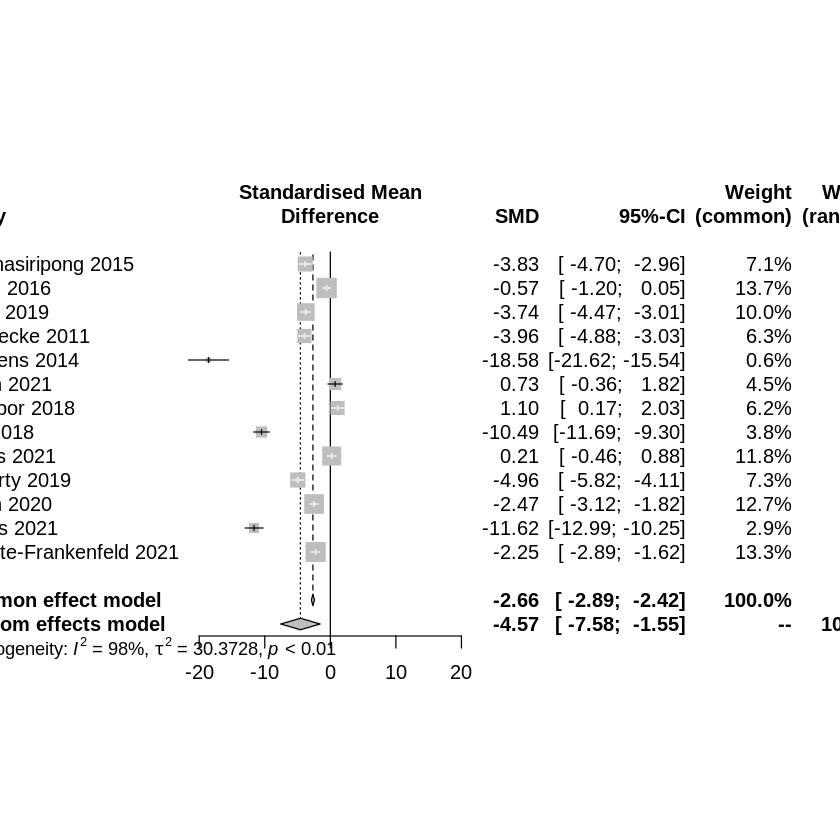

In [92]:
print(1)
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.all, m.data.list, time.point = 2,
  double.scale = TRUE, preferred.scale = "Depression Anxiety and Stress Scale (DASS)"
)
print(2)

[1] "Stress"
[1] "Depression Anxiety and Stress Scale (DASS)"




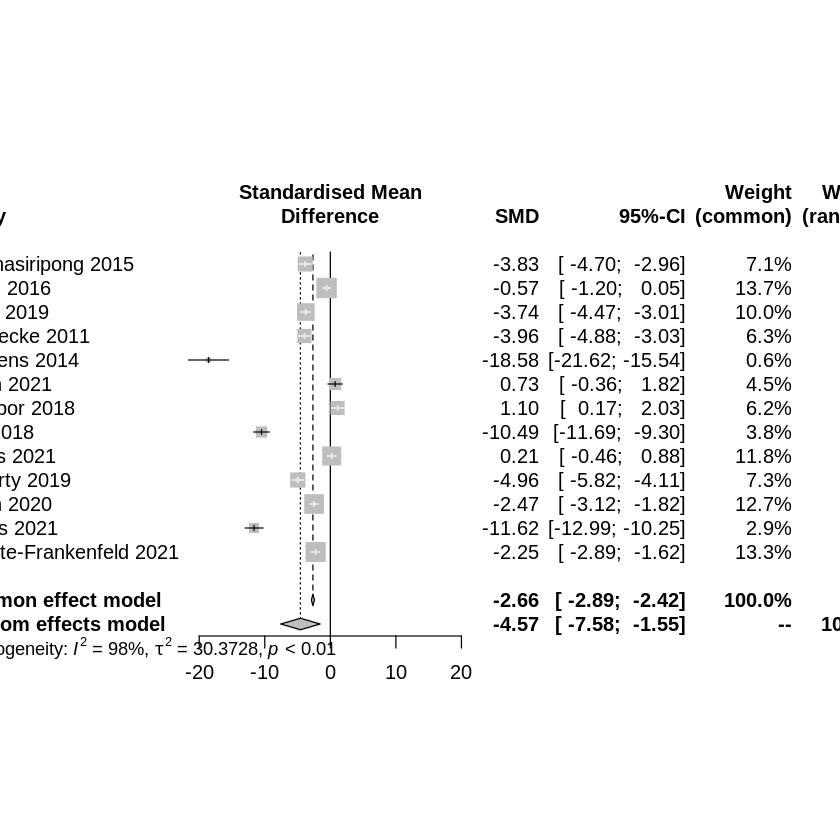



[1] "Depression Anxiety and Stress Scale (DASS)"


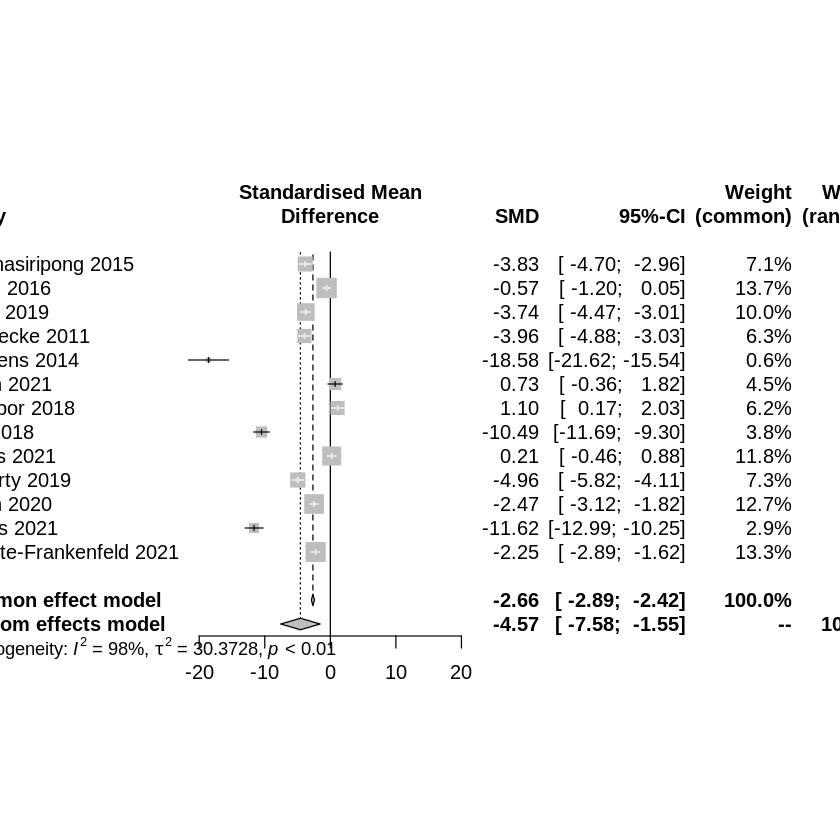



[1] "Perceived Stress Scale (PSS)"
[1] "#########################################"
[1] "Anxiety (state)"


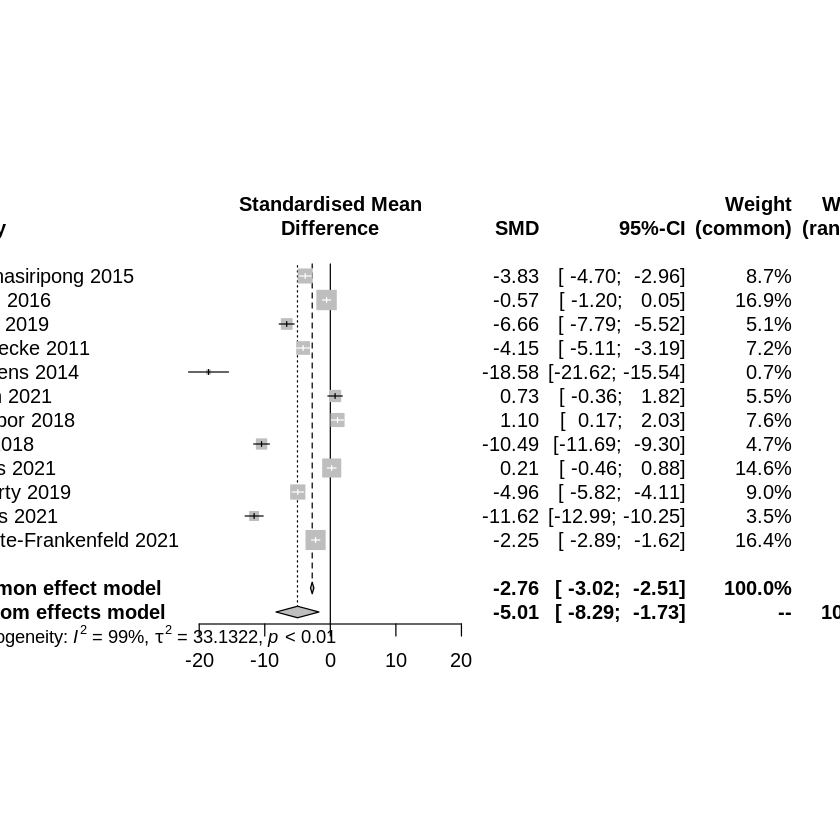



[1] "#########################################"
[1] "Anxiety (trait)"


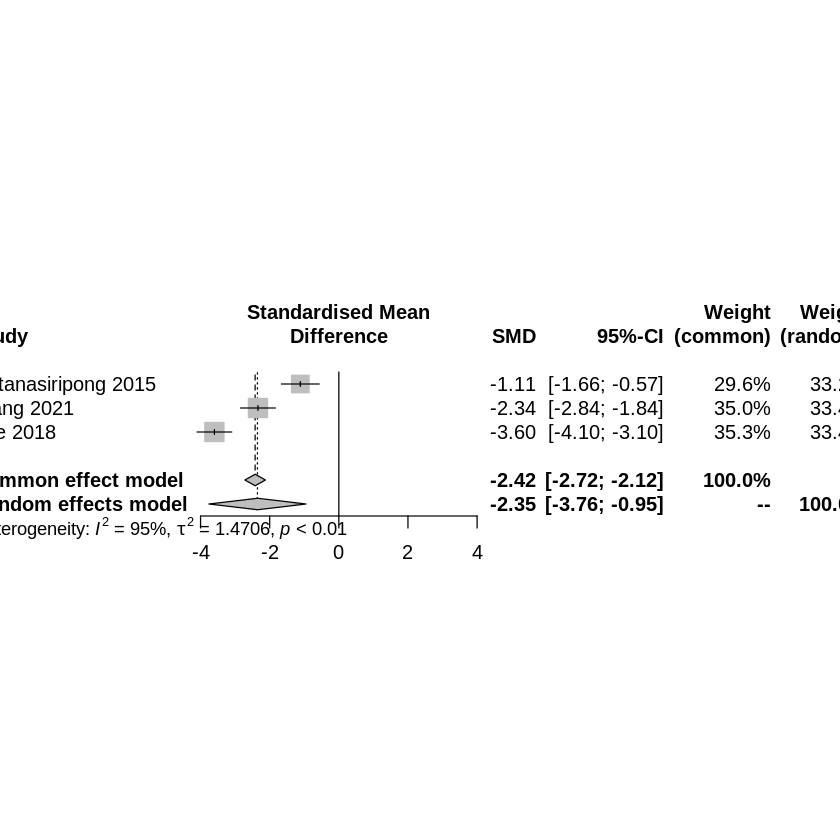



[1] "#########################################"
[1] "Depression (trait)"


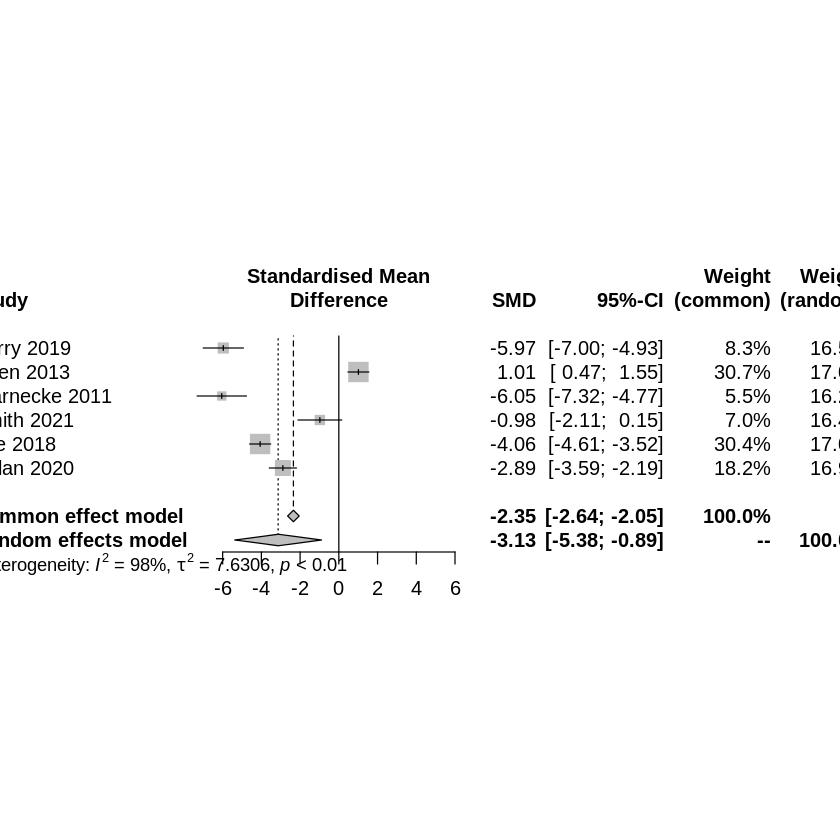



[1] "#########################################"
[1] "Self-efficacy"


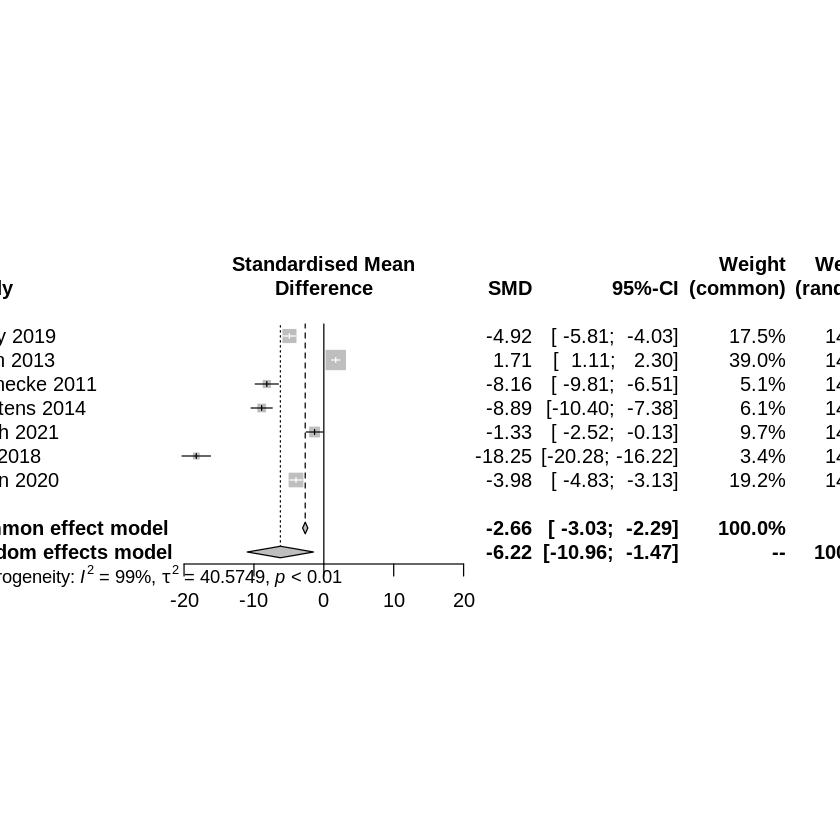



[1] "#########################################"
[1] "Resilience Scale"


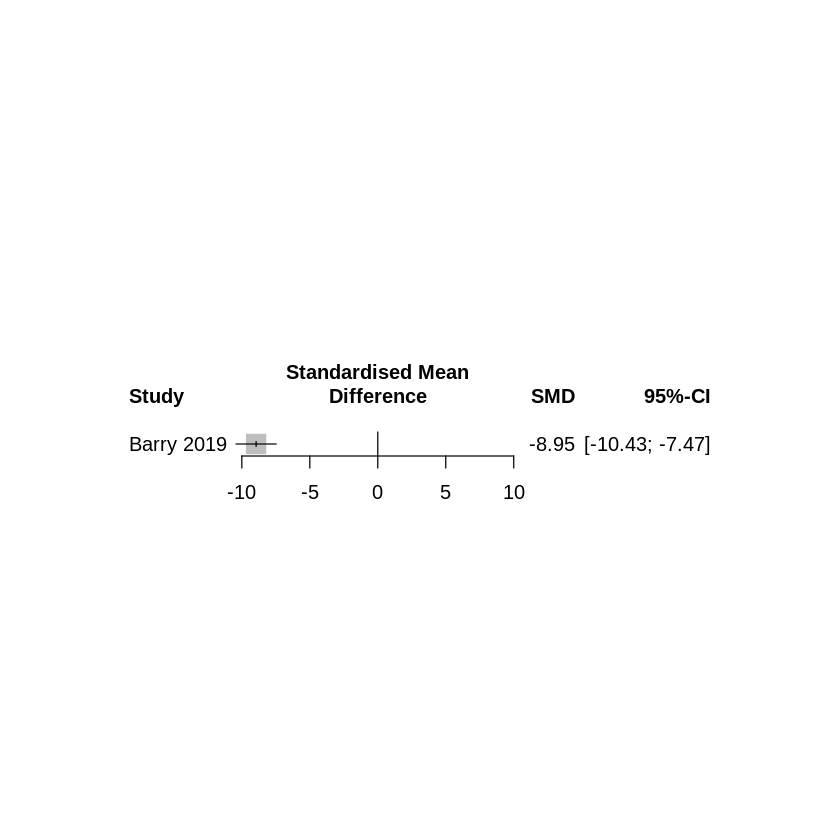



[1] "#########################################"
[1] "Hope"


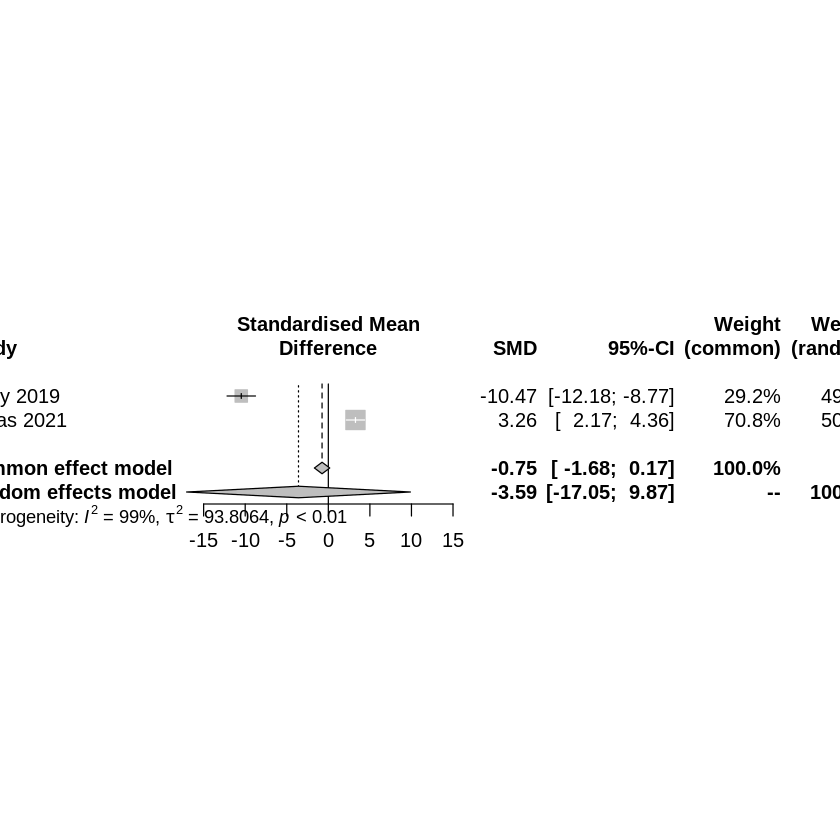



[1] "#########################################"
[1] "Optimism or positive attributional style"


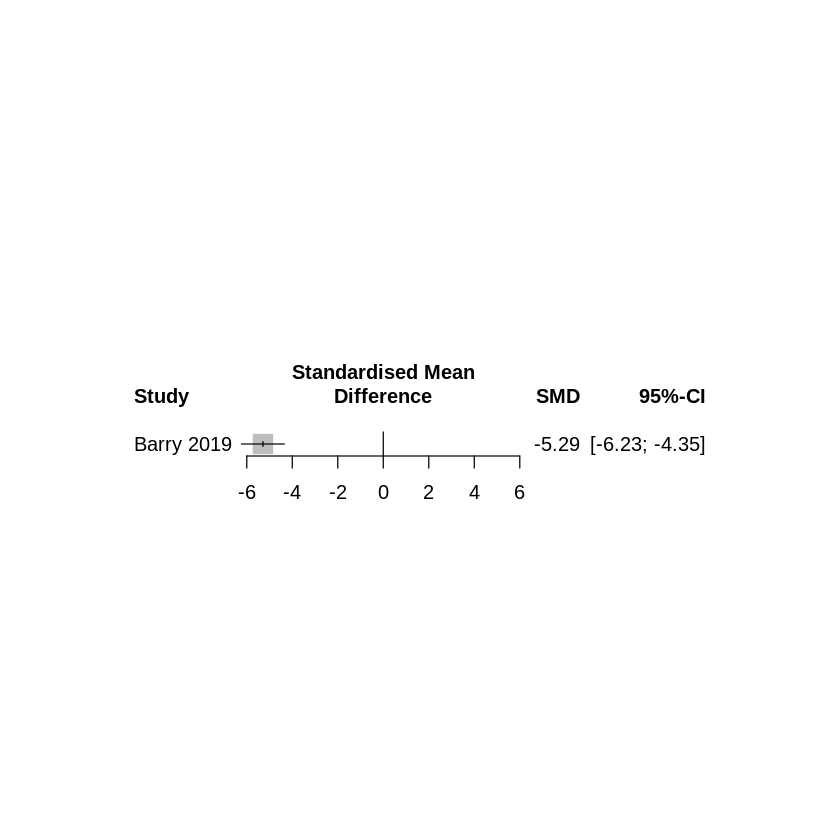



[1] "#########################################"
[1] "Mindfulness (trait)"


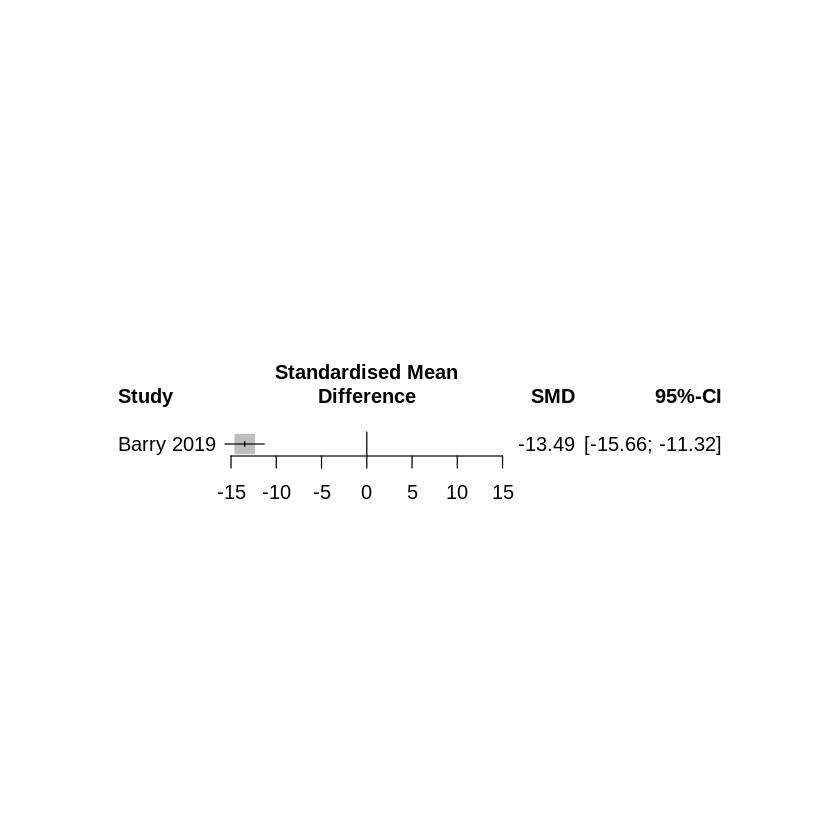



[1] "#########################################"
[1] "Well-being or quality of life"


[1] "#########################################"
[1] "Acceptance"


Error in outome: Acceptance



<simpleError: Argument 'n.e' is NULL.>


[1] "#########################################"
[1] "Religiosity or spirituality or religious coping"


Error in outome: Religiosity or spirituality or religious coping



<simpleError: Argument 'n.e' is NULL.>


[1] "#########################################"
[1] "Mindfulness (state)"


Error in outome: Mindfulness (state)



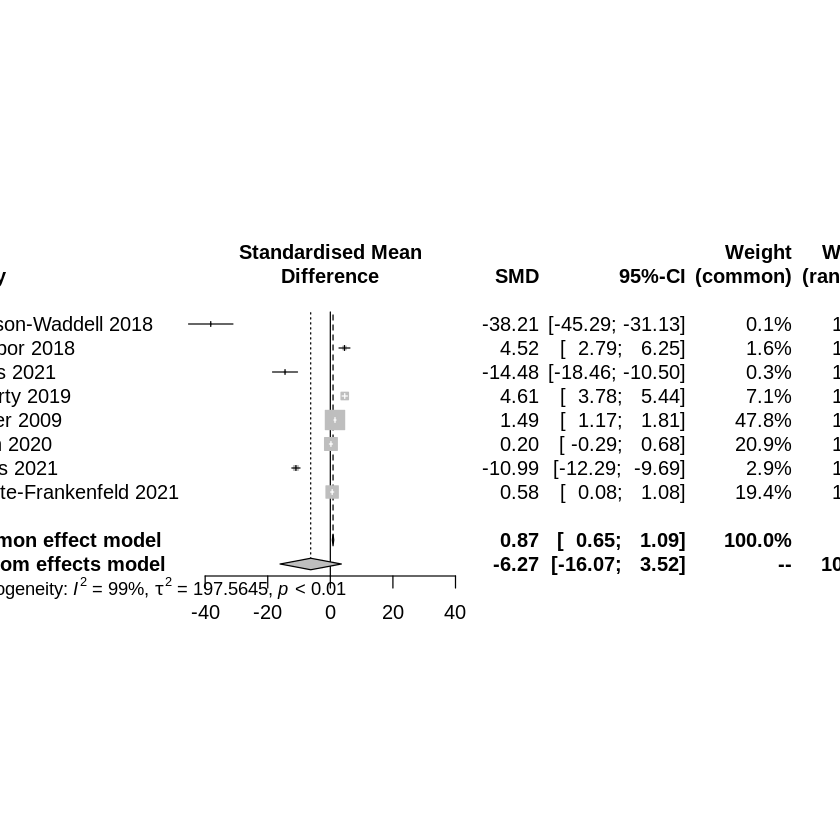

<simpleError: Argument 'n.e' is NULL.>


[1] "#########################################"
[1] "Self-compassion"


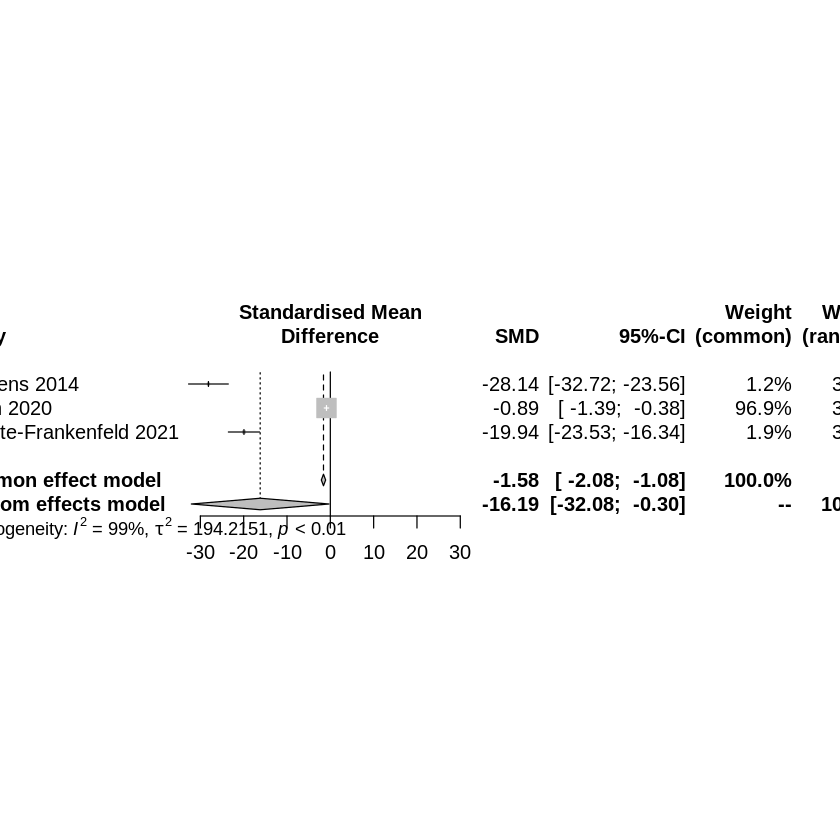



[1] "#########################################"
[1] "Self-acceptance"


[1] "#########################################"
[1] "Empathy"


Error in outome: Empathy



<simpleError: Argument 'n.e' is NULL.>


[1] "#########################################"
[1] "Self-esteem"


Error in outome: Self-esteem



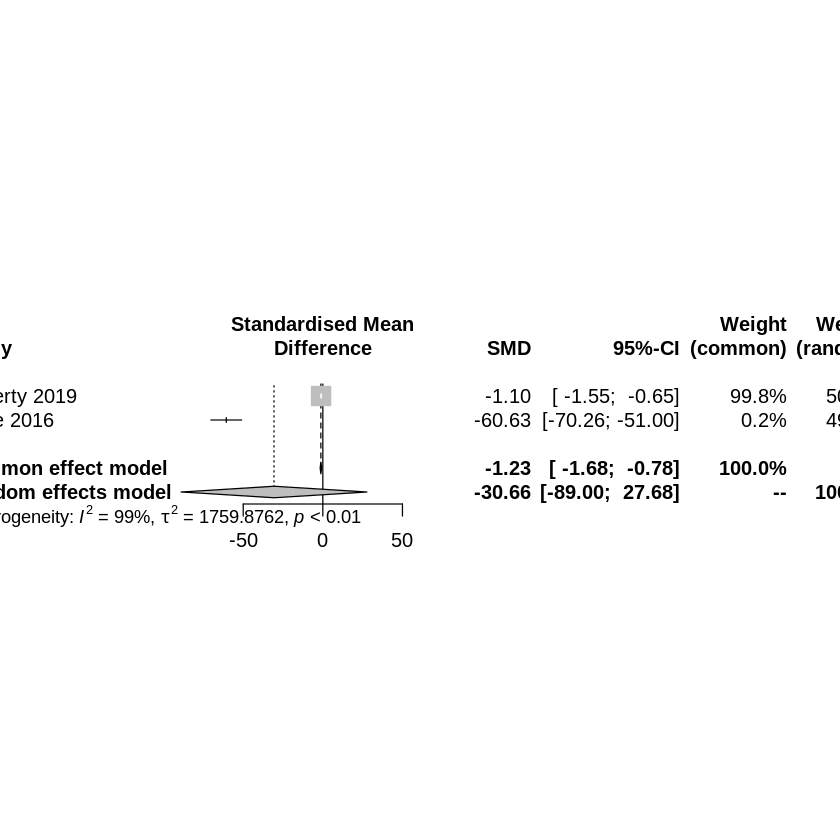

<simpleError: Argument 'n.e' is NULL.>


[1] "#########################################"


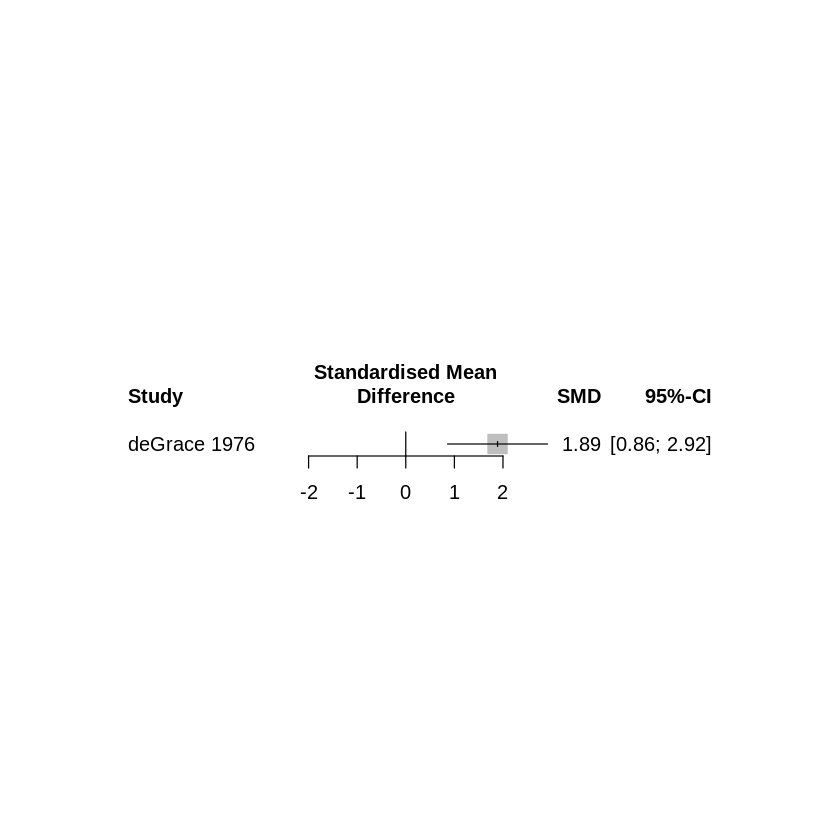

In [88]:
preferred.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

for (outcome in present.outcomes){
  if (outcome == "Stress"){
    print(outcome)
    print("Depression Anxiety and Stress Scale (DASS)")  
    forest.plt.by.outcome..med.type(
      outcome, meditation.type.all, m.data.list, time.point = 2,
      double.scale = TRUE, preferred.scale = "Depression Anxiety and Stress Scale (DASS)"
    )
    cat("\n\n")
 
    forest.plt.by.outcome..med.type(
      outcome, meditation.type.all, m.data.list, time.point = 2,
      double.scale = TRUE, preferred.scale = "Depression Anxiety and Stress Scale (DASS)"
    )
    cat("\n\n")

    print("Depression Anxiety and Stress Scale (DASS)")
    forest.plt.by.outcome..med.type(
      outcome, meditation.type.all, m.data.list, time.point = 2,
      double.scale = TRUE, preferred.scale = "Perceived Stress Scale (PSS)"
    )
    cat("\n\n")
    print("Perceived Stress Scale (PSS)")
  } else {
    print(outcome)
    
    tryCatch(
      {
      forest.plt.by.outcome..med.type(
        outcome, meditation.type.all, m.data.list, time.point = 2
      )
      
          # try part
      },
      error=function(cond) {
        message(paste("Error in outome:", outcome))
        print(cond)
        return("")
        # except part for errors
        
      },
      warning=function(cond) {
        message(paste("Warning in outome:", outcome))
        print(cond)
        return("")
        # except part for warnings
        
      }
    )
    cat("\n\n")
  }
  print("#########################################")
}

### Attentional Family

#### Resilience Scale

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Resilience Scale", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Resilience Scale"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Resilience Scale"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (trait)", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (state)", meditation.type.attentional, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (state)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (state)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Depression (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Depression (trait)", meditation.type.attentional, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Depression (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Depression (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Stress

In [ ]:
preferred.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

In [ ]:
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.all, m.data.list, time.point = 2,
  double.scale = TRUE, preferred.scale = preferred.scales[1], print.descriptive = TRUE
)

In [ ]:
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional, m.data.list, time.point = 2,
  double.scale = TRUE, preferred.scale = preferred.scales[1], print.descriptive = TRUE
)

In [ ]:
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional, m.data.list, time.point = 2,
  double.scale = TRUE, preferred.scale = preferred.scales[2]
)

#### Well-being or quality of life

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Well-being or quality of life", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Well-being or quality of life"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Well-being or quality of life"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Acceptance", meditation.type.attentional, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Acceptance"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Acceptance"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Empathy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Empathy", meditation.type.attentional, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Empathy"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Empathy"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Hope

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Hope", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Hope"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Hope"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (state)", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (state)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (state)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (trait)", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Optimism or positive attributional style

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Optimism or positive attributional style", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Optimism or positive attributional style"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Optimism or positive attributional style"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Religiosity or spirituality or religious coping

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Religiosity or spirituality or religious coping", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Religiosity or spirituality or religious coping"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Religiosity or spirituality or religious coping"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-efficacy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-efficacy", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-efficacy"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-efficacy"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-acceptance", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-acceptance"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-acceptance"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-esteem

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-esteem", meditation.type.attentional, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-esteem"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-esteem"))
    print(cond)
    return("")
    # except part for warnings
  }
)

### Constructive Family

#### Resilience Scale

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Resilience Scale", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Resilience Scale"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Resilience Scale"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (trait)", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (state)", meditation.type.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (state)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (state)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Depression (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Depression (trait)", meditation.type.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Depression (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Depression (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Stress

In [ ]:
preferred.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

forest.plt.by.outcome..med.type(
  "Stress", meditation.type.constructive, m.data.list, time.point = 2, double.scale = TRUE, preferred.scale = preferred.scales[1]
)

In [ ]:
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.constructive, m.data.list, time.point = 2, double.scale = TRUE, preferred.scale = preferred.scales[2]
)

#### Well-being or quality of life

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Well-being or quality of life", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Well-being or quality of life"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Well-being or quality of life"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Acceptance", meditation.type.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Acceptance"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Acceptance"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Empathy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Empathy", meditation.type.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Empathy"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Empathy"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Hope

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Hope", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Hope"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Hope"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (state)", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (state)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (state)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (trait)", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Optimism or positive attributional style

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Optimism or positive attributional style", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Optimism or positive attributional style"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Optimism or positive attributional style"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Religiosity or spirituality or religious coping

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Religiosity or spirituality or religious coping", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Religiosity or spirituality or religious coping"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Religiosity or spirituality or religious coping"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-efficacy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-efficacy", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-efficacy"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-efficacy"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-acceptance", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-acceptance"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-acceptance"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-esteem

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-esteem", meditation.type.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-esteem"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-esteem"))
    print(cond)
    return("")
    # except part for warnings
  }
)

### Attentional and Contructive Family mixed

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Resilience Scale", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Resilience Scale"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Resilience Scale"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (trait)", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (state)", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (state)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (state)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Depression (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Depression (trait)", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Depression (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Depression (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Stress

In [ ]:
preferred.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional.and.constructive, m.data.list, time.point = 2, double.scale = TRUE, preferred.scale = preferred.scales[1]
)

In [ ]:
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional.and.constructive, m.data.list, time.point = 2, double.scale = TRUE, preferred.scale = preferred.scales[2]
)

#### Well-being or quality of life

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Well-being or quality of life", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Well-being or quality of life"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Well-being or quality of life"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Acceptance", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Acceptance"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Acceptance"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Empathy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Empathy", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Empathy"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Empathy"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Hope

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Hope", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Hope"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Hope"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (state)", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (state)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (state)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (trait)", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Optimism or positive attributional style

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Optimism or positive attributional style", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Optimism or positive attributional style"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Optimism or positive attributional style"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Religiosity or spirituality or religious coping

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Religiosity or spirituality or religious coping", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Religiosity or spirituality or religious coping"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Religiosity or spirituality or religious coping"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-efficacy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-efficacy", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-efficacy"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-efficacy"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-acceptance", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-acceptance"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-acceptance"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-esteem

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-esteem", meditation.type.attentional.and.constructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-esteem"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-esteem"))
    print(cond)
    return("")
    # except part for warnings
  }
)

### All Families mixed 

#### Resilience Scale

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Resilience Scale", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Resilience Scale"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Resilience Scale"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (trait)", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Anxiety (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Anxiety (state)", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Anxiety (state)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Anxiety (state)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Depression (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Depression (trait)", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Depression (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Depression (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Stress

In [ ]:
preferred.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2, double.scale = TRUE, preferred.scale = preferred.scales[1]
)

In [ ]:
forest.plt.by.outcome..med.type(
  "Stress", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2, double.scale = TRUE, preferred.scale = preferred.scales[2]
)

#### Well-being or quality of life

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Well-being or quality of life", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Well-being or quality of life"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Well-being or quality of life"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Acceptance", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Acceptance"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Acceptance"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Empathy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Empathy", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
    # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Empathy"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Empathy"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Hope

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Hope", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Hope"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Hope"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (state)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (state)", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (state)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (state)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Mindfulness (trait)

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Mindfulness (trait)", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Mindfulness (trait)"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Mindfulness (trait)"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Optimism or positive attributional style

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Optimism or positive attributional style", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Optimism or positive attributional style"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Optimism or positive attributional style"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Religiosity or spirituality or religious coping

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Religiosity or spirituality or religious coping", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Religiosity or spirituality or religious coping"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Religiosity or spirituality or religious coping"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-efficacy

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-efficacy", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-efficacy"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-efficacy"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-acceptance

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-acceptance", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-acceptance"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-acceptance"))
    print(cond)
    return("")
    # except part for warnings
  }
)

#### Self-esteem

In [ ]:
tryCatch(
  {
  forest.plt.by.outcome..med.type(
    "Self-esteem", meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
  )
      # try part
  },
  error=function(cond) {
    message(paste("Error in outome:", "Self-esteem"))
    print(cond)
    return("")
    # except part for errors
  },
  warning=function(cond) {
    message(paste("Warning in outome:", "Self-esteem"))
    print(cond)
    return("")
    # except part for warnings
  }
)

# Old Code

In [ ]:
# preferred.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

# for (outcome in present.outcomes){
#   print(outcome)
#   if (outcome == "Stress"){
#     for (preferred.scale in preferred.scales){
#       print(preferred.scale)
#       forest.plt.by.outcome..med.type(
#         outcome, meditation.type.attentional, m.data.list, time.point = 2, double.scale = TRUE, preferred.scale = preferred.scale
#       )
#       Sys.sleep(1)
#       cat("\n\n")
#     }
#   } else {
#     print(outcome)
#     tryCatch(
#       {
#       forest.plt.by.outcome..med.type(
#         outcome, meditation.type.attentional, m.data.list, time.point = 2
#       )
#       Sys.sleep(1)
#           # try part
#       },
#       error=function(cond) {
#         message(paste("Error in outome:", outcome))
#         print(cond)
#         return("")
#         # except part for errors
#       },
#       warning=function(cond) {
#         message(paste("Warning in outome:", outcome))
#         print(cond)
#         return("")
#         # except part for warnings
#       }
#     )
#     cat("\n\n")
#   }
#   print("#########################################")
# }

In [ ]:
# preferred.scales <- c("Depression Anxiety and Stress Scale (DASS)", "Perceived Stress Scale (PSS)")

# for (outcome in present.outcomes){
#   print(outcome)
#   if (outcome == "Stress"){
#     for (preferred.scale in preferred.scales){
#       cat(" preferred scale:", preferred.scale)
#       forest.plt.by.outcome..med.type(
#         outcome, meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2, double.scale = TRUE, preferred.scale = preferred.scale
#       )
#       cat("\n")
#     }
#   } else {
#     print(outcome)
#     tryCatch(
#       {
#       forest.plt.by.outcome..med.type(
#         outcome, meditation.type.attentional.constructive.and.deconstructive, m.data.list, time.point = 2
#       )
#           # try part
#       },
#       error=function(cond) {
#         message(paste("Error in outome:", outcome))
#         print(cond)
#         return("")
#         # except part for errors
#       },
#       warning=function(cond) {
#         message(paste("Warning in outome:", outcome))
#         print(cond)
#         return("")
#         # except part for warnings
#       }
#     )
#     cat("\n")
#   }
# }

### Debugging Meditation Type Filter & an preferred Scale Filter

In [ ]:
# # Get all studies with stress, their intervention names, and descriptive results to test the forest plot function
# stress.outcome.names.df <- outcome.names.df

# for (row in 1:nrow(stress.outcome.names.df)){
#   if (!("Stress" %in% stress.outcome.names.df[row,])){
#     stress.outcome.names.df <- stress.outcome.names.df[-c(row),]
#   }
# }

# # above loop does not work for every row for some reason --> repeating the loop works
# for (row in 1:nrow(stress.outcome.names.df)){
#   if (!("Stress" %in% stress.outcome.names.df[row,])){
#     stress.outcome.names.df <- stress.outcome.names.df[-c(row),]
#   }
# }

# stress.outcome.names.df

In [ ]:
# outcome.measures.df.list[rownames(stress.outcome.names.df)]

not fitting study names for stress (no suficient descriptive results (prefering PSS)):
- Nidich 2009
- Plummer 2018
- Janowiak 1994
- Messer 2016
- Nolan 2020 (other scales res are present)

fitting:
- Ratanasiripong 2015
- Sloan 2016
- Barry 2019
- Warnecke 2011
- Weytens 2014	
- Smith 2021
- Siembor 2018
- Lee 2018
- Bultas 2021
- Huberty 2019
- Dorais 2021
- Schulte-Frankenfeld 2021

not in forestplot:
None

In [ ]:
# print.array.not.na(results.descriptive.array[,,"T1",,,rownames(stress.outcome.names.df)])

In [ ]:
# intervention.comparisons.df.list

In [ ]:
# forest.plt.by.outcome..med.type(
#   "Stress", meditation.type.all, m.data.list, time.point = "T1",
#   double.scale = TRUE, preferred.scale = "Perceived Stress Scale (PSS)", print.descriptive = TRUE
# )

In [ ]:
# outcome <- "Stress"
# meditation.types <- meditation.type.all
# time.point <- 2
# outcome.no <- 1
# intervention.no <- 1
# study <- which(study.names == "Lee 2018")
# scale <- 1

In [ ]:
# # Check data of studys not included in forest plot in function's if statement

# if (
#   m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome &
#   !(
#     is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
#     m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
#     m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder
#   ) &
#   (
#     m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#     ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) & intervention.no == 4)
#   ) &
#   !(
#     NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study] |
#     nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study]
#   ) &
#   !(
#     NA %in% results.descriptive.array[4,,time.point, outcome.no, scale, study] |
#     nm.placeholder %in% results.descriptive.array[4,, time.point, outcome.no, scale, study]
#   )
# ){
#   print("TRUE")
# } else {
#   print("FALSE")
# }

In [ ]:
# m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome

In [ ]:
# !(
#   is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
#   m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
#   m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder
# )

In [ ]:
# (
#   m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#   ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) & intervention.no == 4)
# )

In [ ]:
# m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types

In [ ]:
# m.data.list[["meditation.techniques.df"]][study, intervention.no]

In [ ]:
# intervention.comparisons.df.list[study]

In [ ]:
# m.data.list[["meditation.techniques.df"]]

In [ ]:
# !(
#   NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study] |
#   nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study]
# )

In [ ]:
  # !(
  #   NA %in% results.descriptive.array[4,,time.point, outcome.no, scale, study] |
  #   nm.placeholder %in% results.descriptive.array[4,, time.point, outcome.no, scale, study]
  # )

# Code of Test-Meta-Analyses

In [ ]:
# library('readxl')
# # import csv file into R
# # data <- read_excel('review_47966_20220515233722.xlsx')
# # write.csv(data, file = 'review_47966_20220515233722.csv')
# data <- read.csv('review_47966_20220515233722.csv')

# # create df of all Meditation 1 studies
# data.med1 =  data[data$Practiced.Techniques.in.Intervention.1 == 'Meditation 1', ] # select only rows with meditation 1 as intervetion 1


# # pooled.sd <- sqrt(((n1-1)*s1^2 + (n2-1)*s2^2) / (n1+n1-2))
# # mean.diff <- mean.1 - mean.2
# # cohens'd <- mean.diff/pooled.sd
# # calculate hedges g out of cohens d with hedges_g()

# # create df for meta analysis with Meditation 1
# library('esc')
# df.meta <- data.frame(
#   study.id =	data.med1[, 'Study.ID'],
#   number.meditation =	data.med1[, 'Sample.size.Intervention.1.T1'],  # number of participants in meditation condition
#   mean.meditation =	data.med1[, 'Intervention.1.Mean.T2'],
#   sd.meditation =	data.med1[, 'Intervention.1.SD.T2'],
#   number.control =	data.med1[, 'Sample.size.Intervention.2.T1'],
#   mean.conttrol	= data.med1[, 'Intervention.2.Mean.T2'],
#   sd.control	= data.med1[, 'Intervention.2.SD.T2'],
#   med.frequency = data.med1[, 'Frequency'],
#   pooled.sd = sqrt((data.med1[, 'Sample.size.Intervention.1.T1']-1)*data.med1[, 'Intervention.1.SD.T2']^2 + (data.med1[, 'Sample.size.Intervention.2.T1']-1)*data.med1[, 'Intervention.2.SD.T2']^2) / (data.med1[, 'Sample.size.Intervention.1.T1']+data.med1[, 'Sample.size.Intervention.1.T1']-2),
#   mean.diff.T2 = data.med1[, 'Intervention.1.Mean.T2']-data.med1[, 'Intervention.2.Mean.T2']
# )

# df.meta$hedges.g <- (df.meta[, "pooled.sd"] / df.meta[, "mean.diff.T2"])

# library('meta')
# res.df_meta =  metacont(number.meditation, mean.meditation, sd.meditation, 
#                         number.control, mean.conttrol, sd.control,
#                         fixed = T, random = T, studlab = study.id,
#                         data = df.meta, sm = "SMD")

# # plot forest plot
# forest(res.df_meta, leftcols = c('studlab'))

# # plot funnel plot
# funnel(res.df_meta)

# # metabias: Test for funnel plot asymmetry, based on rank correlation or linear regression method.
# metabias(res.df_meta, method.bias = 'linreg', k.min = , plotit = T)
# # The p-value is 0.973 which implies no publication bias. However, this meta-analysis contains k=5 studies. Egger’s test may lack the statistical power to detect bias when the number of studies is small (i.e., k<10).

# # conduct meta-regression, see: https://cjvanlissa.github.io/Doing-Meta-Analysis-in-R/plotting-regressions.html
# library('metafor')
# random.effects.model <- rma(
#   df.meta[, "hedges.g"],
#   df.meta[, "pooled.sd"]
# )
#   # second paramenter in rma-function = sampling variance = pooled standard deviation?

# install.packages('ggplot2')
# library(ggplot2)

# df.meta$weights <- 1/sqrt(df.meta$pooled.sd)
# # Specify basic plot, mapping med.frequency to the x-axis, effect size 'hedges.g' to the y-axis,
# # and 'weights' to the weight parameter.
# ggplot(df.meta, aes(x = med.frequency, y = hedges.g, size = weights)) +
#   geom_point(shape = 1) + # Add scatter
#   geom_abline(intercept = random.effects.model$b[1], slope = random.effects.model$b[2]) + # Add regression line
#   theme_bw() + # Apply black and white theme
#   theme(legend.position = "none") # Remove legend
#   # see link for beatiful meta-regression with convidence intervals: https://bookdown.org/robcrystalornelas/meta-analysis_of_ecological_data/meta-regression.html#meta-regression-with-continuous-variable

# # plot traffic light plot for RoB
# ## use {robvis} via the rob_traffic_light function
# ## see: https://bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/risk-of-bias-plots.html#traffic-light-plots

# # plot Summary Plots
# ## use use {robvis} via the rob_summary function

# Notes

- Different Scales
    - 2 Array-Dims with same values
    - Results in Dim "Scale.2" only if 2nd scale is present, else: NA

- Ignore 2nd scale entry for Sloan 2016 

# ToDo

- find solution for
  - value: '3.79 during intervention, 2.04 during follow-up mean' in "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"

- cluster meditation types for lower heterogeneity
  - search all possible combinations (max. 3 groups) for lowest heterogeneity for stress
  - use genetic algoryithms if necessary

- implement option to exclude speciftic studies or outlayers in forest plot function

### Why does forest plt function prints later / in the wrong order? ###
--> ### All Meditation types

# Array Dims and Dimnames

Dates of Measuring Time Points
	4 x 1
	c("Time.Point.0", "Time.Point.1", "Time.Point.2", "Time.Point.3")
	c("Date")
	Time.Point.0.Date:Time.Point.3.Date
	
Between-Measuring Time Points' Duration
	3 x 1
	c("Time.Point.0...1", "Time.Point.0...2", "Time.Point.0...3")
	c("Duration.in.Days")
	Time.Point.0...1:Duration.in.Days

Intervention and Comparisons
	7 x 4
	c("Name", "Short.Description", "Delivery.Mode", "Meditation.App", "Sessions.Duration.in.minutes", Frequency.in.times.per.week", "Total.Duration.in.Days")
	c("Intervention.1", "Intervention.2", "Intervention.3", "Control")
	Name.Intervention 1:Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4

Definition of Outcomes
	7 x 1
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	c("Definition")
	Outcome.1:Definition

Measures of Outcomes
	7 x 3
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	c("Measures.Name", "Start.and.End.Point", "High.or.low.means.resilient")
	Outcome.1.Scale.s.or.other.Measure.s.Name:Outcome.7.High.or.low.means.resilient
	
Means and SDs of Outcomes
	4 x 3 x 4 x 7
	c("Intervention.1", "Intervention.2", "Intervention.3", "Control"
	c("Mean", "SD", "n")
	c("T0", "T1", "T2", "T3")
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	Intervention.1.Mean.O1T0:Control.or.Intervention.4.n.in.case.of.period.O7T3

Quantitative Results of Data Analyses
	7 x 3 x 3 x 6
	c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7")
	c("P.Value", "Effect.Size", "Effect.Size.CI")
	c("T1", "T2", "T3")
	c("Int1.X.Int2", "Int1.X.Int3", "Int1.X.Int4", "Int2.X.Int3", "Int2.X.Int4", "Int3.X.Int4")
	Outcome.1.P.Value.1x2T1:Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3

Qualitative Results of Data Analyses
	7 x 3
	c("Key.Theme.1", "Key.Theme.2", "Key.Theme.4", "Key.Theme.5", "Key.Theme.6", "Key.Theme.7")
	c("Name.of.Key.Theme", "Description.of.Key.Theme", "Results")
	Key.Theme.1:Results